X-Inactivation Re-analysis: RAP-seq, RNA-seq, and GSEA

A re-analysis of publicly available RAP-seq and RNA-seq data from the van Bemmel et al. (2019, Nature Genetics) study on X-chromosome inactivation (XCI).

https://www.nature.com/articles/s41588-019-0412-0

https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE111205


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import requests

import scanpy as sc

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import matplotlib.pyplot as plt
# import random

import gseapy as gp

RNA Antisense Purification plot

In [ ]:
data = pd.read_csv("/Users/sanskar/pythonprojects/singlecell/GSE111205/GSE111205_RAP_processed_data.txt", sep='\t')
data

Location on X  Location on X.1  Raw.E14.1  Norm.E14.1  Raw.2G1.1  \
0          3000000          3000000         60    2.846669        312   
1          4000000          4000000         46    1.866637        336   
2          5000000          5000000         20    1.224603        200   
3          6000000          6000000         36    1.867618        350   
4          7000000          7000000         38    1.362017        506   
..             ...              ...        ...         ...        ...   
159      162000000        162000000         40    1.835872        204   
160      163000000        163000000         36    1.707753        290   
161      164000000        164000000         34    1.981470        116   
162      165000000        165000000         28    1.432556        166   
163      166000000        166000000        534    8.774149       1834   

     Norm.2G1.1  Location on X.2  Raw.18C6.1  Norm.18C6.1  Location on X.3  \
0      4.339459          3000000          38     2.210591          3000000   
1      4.322900          4000000          40     2.006441          4000000   
2      3.666487          5000000          46     2.905624          5000000   
3      6.442225          6000000          72     4.955278          6000000   
4      4.660567          7000000          98     4.278863          7000000   
..          ...              ...         ...          ...              ...   
159    2.545693        162000000          24     1.176643        162000000   
160    3.681272        163000000          48     2.864412        163000000   
161    1.739534        164000000          64     4.497655        164000000   
162    2.417846        165000000          28     1.767045        165000000   
163    7.033944        166000000         446     5.144559        166000000   

     ...  Norm.E14.2  Location on X.4  Raw.2G1.2  Norm.2G1.2  Location on X.5  \
0    ...    2.618388          3000000        168    4.549899          3000000   
1    ...    2.371232          4000000        196    4.910249          4000000   
2    ...    2.584094          5000000        150    5.354550          5000000   
3    ...    2.863082          6000000        288   10.322190          6000000   
4    ...    1.978095          7000000        466    8.357679          7000000   
..   ...         ...              ...        ...         ...              ...   
159  ...    1.340986        162000000        220    5.345767        162000000   
160  ...    1.848005        163000000        360    8.898440        163000000   
161  ...    3.027108        164000000        184    5.372844        164000000   
162  ...    1.660936        165000000        200    5.672337        165000000   
163  ...    2.240332        166000000        432    3.226227        166000000   

     Raw.18C6.2  Norm.18C6.2  Location on X.6  Raw.MLF   Norm.MLF  
0            80     2.348392          3000000    41759   8.914003  
1            70     1.771823          4000000    50454   9.047583  
2            20     0.637481          5000000    46744  10.231201  
3            86     2.986688          6000000    56253  10.882317  
4           104     2.291350          7000000    65759  12.033861  
..          ...          ...              ...      ...        ...  
159          64     1.583322        162000000    36228   7.337395  
160          58     1.746538        163000000    46114   8.308968  
161          44     1.560323        164000000    37588   8.291027  
162          50     1.592265        165000000    30343   5.722189  
163         138     0.803245        166000000    20114   2.754149  

[164 rows x 21 columns]

In [4]:
print("Missing values in each column:")
print(data.isnull().sum())

print("\nBasic statistics:")
print(data.describe())

samples = ['E14', '2G1', '18C6', 'MLF']

Missing values in each column:
Location on X      0
Location on X.1    0
Raw.E14.1          0
Norm.E14.1         0
Raw.2G1.1          0
Norm.2G1.1         0
Location on X.2    0
Raw.18C6.1         0
Norm.18C6.1        0
Location on X.3    0
Raw.E14.2          0
Norm.E14.2         0
Location on X.4    0
Raw.2G1.2          0
Norm.2G1.2         0
Location on X.5    0
Raw.18C6.2         0
Norm.18C6.2        0
Location on X.6    0
Raw.MLF            0
Norm.MLF           0
dtype: int64

Basic statistics:
       Location on X  Location on X.1   Raw.E14.1  Norm.E14.1    Raw.2G1.1  \
count   1.640000e+02     1.640000e+02   164.00000  164.000000   164.000000   
mean    8.450000e+07     8.450000e+07    80.00000    3.371001   357.463415   
std     4.748684e+07     4.748684e+07   463.93013   16.848158   601.337634   
min     3.000000e+06     3.000000e+06     4.00000    0.317450    84.000000   
25%     4.375000e+07     4.375000e+07    26.00000    1.337436   166.000000   
50%     8.450000e+07     8.4

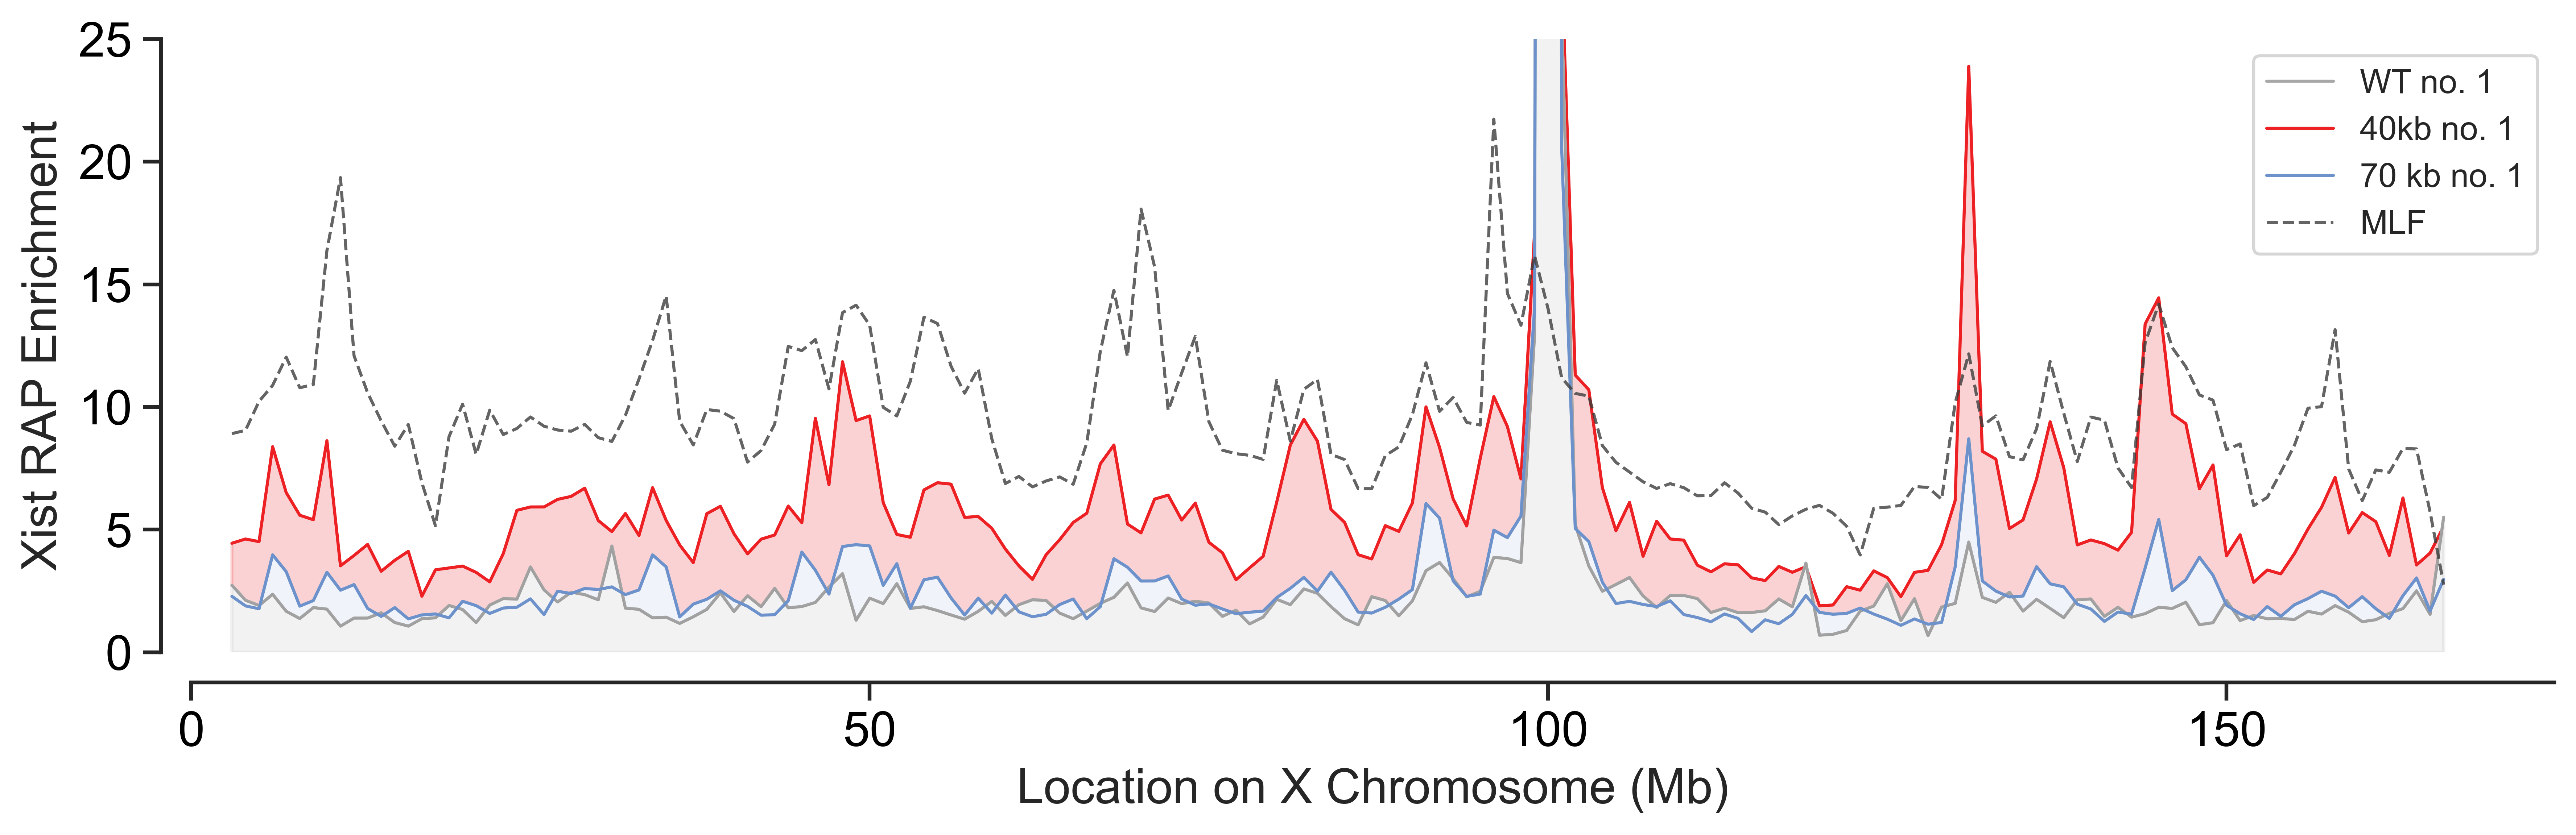

In [6]:
# plot of normalized values by location for each sample done
plt.figure(figsize=(12, 4))

color_map={
    'E14': '#828282',
    '2G1': '#ed2024',
    '18C6': '#6c91cb',
    'MLF': '#3d3d3d'
}
order_map={
    'E14': 1,
    '2G1': -10,
    '18C6': 3,
    'MLF': 2
}

sns.set_theme(style="ticks", rc={"figure.dpi": 600} )

ax = plt.gca()

sample_map = {'E14':'WT no.1',
              '2G1':'40kb no. 1',
              '18C6':'70 kb no. 1',
              'MLF':'MLF'}
# color = color_map.get(sample, 'black')
# order = order_map.get(sample, 0)

plt.plot(data['Location on X'], data['Norm.MLF'],
         label='MLF', linewidth=1, color=color_map["MLF"], zorder=7, linestyle='--', alpha=0.8)        #MLF
# plt.fill_between(data['Location on X'], data['Norm.MLF'],
#                       color='#ffffff', alpha=0.2, zorder=2)

data['Avg.2G1'] = data[['Norm.2G1.1', 'Norm.2G1.2']].mean(axis=1)
plt.plot(data['Location on X'], data['Avg.2G1'],
         label='40kb no. 1', linewidth=1, color=color_map["2G1"], zorder=-1)                #40kb Red
plt.fill_between(data['Location on X'], data['Avg.2G1'],
                      color=color_map["2G1"], alpha=0.2, zorder=-1)

data['Avg.18C6'] = data[['Norm.18C6.1', 'Norm.18C6.2']].mean(axis=1)
plt.plot(data['Location on X'], data['Avg.18C6'],
         linewidth=1, color=color_map["18C6"], zorder=2)                                  #70kb Blue
plt.fill_between(data['Location on X'], data[f'Avg.18C6'],
                      color='#ffffff', alpha=1, zorder=2)

data['Avg.18C6'] = data[['Norm.18C6.1', 'Norm.18C6.2']].mean(axis=1)
plt.plot(data['Location on X'], data['Avg.18C6'],
         label='70 kb no. 1', linewidth=1, color=color_map["18C6"], zorder=6)             #70kb Blue
plt.fill_between(data['Location on X'], data[f'Avg.18C6'],
                      color=color_map['18C6'], alpha=0.1, zorder=3)

data['Avg.E14'] = data[['Norm.E14.1', 'Norm.E14.2']].mean(axis=1)
plt.plot(data['Location on X'], data['Avg.E14'],
          linewidth=1, color=color_map["E14"], zorder=4, alpha=0.7)                                  #WT
plt.fill_between(data['Location on X'], data['Avg.E14'],
                      color='#ffffff', alpha=1, zorder=4)

data['Avg.E14'] = data[['Norm.E14.1', 'Norm.E14.2']].mean(axis=1)
plt.plot(data['Location on X'], data['Avg.E14'],
         label='WT no. 1', linewidth=1, color=color_map["E14"], zorder=4, alpha=0.7)                 #WT
plt.fill_between(data['Location on X'], data['Avg.E14'],
                    color=color_map['E14'], alpha=0.1, zorder=5)

ax.set_xlim(left=0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))  

# to hide the scientific notation popping up in the bottom right
# scientific notification is fixed when setting xticks and xticklabels???

# ax.ticklabel_format(useOffset=False, style='plain')
# ax.tick_params(axis='both', which='both', direction='out', length=4, width=1)

x=[0, 50000000, 100000000, 150000000]
y=[0, 5, 10, 15, 20, 25]

plt.xticks(x, color="0.1", fontsize=10)
plt.yticks(y, color="0.1", fontsize=10)

ax.set_xticks(x) 
ax.set_xticklabels([0, 50, 100, 150], fontsize=16, color="black")  # frormat as Mb
ax.set_yticklabels(y, fontsize=16, color="black")

handles, labels=ax.get_legend_handles_labels()
order = ['WT no. 1', '40kb no. 1', '70 kb no. 1', 'MLF']
ordered_handles = [handles[labels.index(label)] for label in order]
ax.legend(ordered_handles, order)

plt.xlabel('Location on X Chromosome (Mb)', fontsize=16)
plt.ylabel('Xist RAP Enrichment', fontsize=16)
# plt.title('Normalized RAP Values Across X Chromosome', fontsize=20)
plt.grid(False)
plt.ylim(0,25)
plt.tight_layout()
plt.show()

RNA-seq data analysis

In [ ]:
rna_count = pd.read_csv("/Users/sanskar/pythonprojects/singlecell/GSE111205/GSE111205_counts_STAR_GENCODE.txt")
rna_count

Unnamed: 0  E14-d0-B2  2G1-d0-B1  2G1-d0-B2  E14-d0-B6  \
0      ENSMUSG00000090025.1          0          1          0          1   
1      ENSMUSG00000064842.1          0          0          0          0   
2      ENSMUSG00000051951.5        114          3         14        124   
3      ENSMUSG00000089699.1          0          0          0          0   
4      ENSMUSG00000088390.1          0          0          0          0   
...                     ...        ...        ...        ...        ...   
37305  ENSMUSG00000064368.1       1978       2521       1157        459   
37306  ENSMUSG00000064369.1          0          0          1          1   
37307  ENSMUSG00000064370.1     136150     273470     139561     119634   
37308  ENSMUSG00000064371.1         71         91         42         62   
37309  ENSMUSG00000064372.1         23         19         11          8   

       3D5-d0-B6  3D5-d0-B5  E14.2-d0-B13  18C6-d0-B13  20E7-d0-B13  \
0              0          0             0            0            0   
1              0          0             0            0            0   
2             28          6            40           19           55   
3              0          0             0            0            0   
4              0          0             0            0            0   
...          ...        ...           ...          ...          ...   
37305        393        985           588          499         1534   
37306          0          0             0            0            0   
37307     103666     146315        115347       114396       110866   
37308         43         79            68           53           52   
37309          5         16             2            7           28   

       E14.2-d0-B14  18C6-d0-B14  20E7-d0-B14  
0                 0            0            0  
1                 0            0            0  
2                82           54          119  
3                 0            0            0  
4                 0            0            0  
...             ...          ...          ...  
37305          1583         1145          357  
37306             1            0            0  
37307        118494       128254        94870  
37308            79           74           31  
37309            26           22            4  

[37310 rows x 13 columns]

In [8]:
sample_mapping = {
    'Unnamed: 0': 'Gene ID',
    "E14-d0-B2": "RNA_WT_rep1_40kb",
    "E14-d0-B6": "RNA_WT_rep2_40kb",
    "2G1-d0-B1": "RNA_40kb-[Tsix-Xist]_Clone#1_2G1_rep1",
    "2G1-d0-B2": "RNA_40kb-[Tsix-Xist]_Clone#1_2G1_rep2",
    "3D5-d0-B6": "RNA_40kb-[Tsix-Xist]_Clone#2_3D5_rep1",
    "3D5-d0-B5": "RNA_40kb-[Tsix-Xist]_Clone#2_3D5_rep2",
    "E14.2-d0-B13": "RNA_WT_rep1_70kb",
    "E14.2-d0-B14": "RNA_WT_rep2_70kb",
    "18C6-d0-B13": "RNA_70kb-[Xite-Jpx]_Clone#1_18C6_rep1",
    "18C6-d0-B14": "RNA_70kb-[Xite-Jpx]_Clone#1_18C6_rep2",
    "20E7-d0-B13": "RNA_70kb-[Xite-Jpx]_Clone#2_20E7_rep1",
    "20E7-d0-B14": "RNA_70kb-[Xite-Jpx]_Clone#2_20E7_rep2"
}

rna_count = rna_count.rename(columns={'Unnamed: 0': 'Gene ID'})
# rna_count = rna_count.rename(columns=sample_mapping)

# rna_count= rna_count.set_index('Gene ID')
rna_count= rna_count.set_index('Gene ID')

rna_count

E14-d0-B2  2G1-d0-B1  2G1-d0-B2  E14-d0-B6  3D5-d0-B6  \
Gene ID                                                                       
ENSMUSG00000090025.1          0          1          0          1          0   
ENSMUSG00000064842.1          0          0          0          0          0   
ENSMUSG00000051951.5        114          3         14        124         28   
ENSMUSG00000089699.1          0          0          0          0          0   
ENSMUSG00000088390.1          0          0          0          0          0   
...                         ...        ...        ...        ...        ...   
ENSMUSG00000064368.1       1978       2521       1157        459        393   
ENSMUSG00000064369.1          0          0          1          1          0   
ENSMUSG00000064370.1     136150     273470     139561     119634     103666   
ENSMUSG00000064371.1         71         91         42         62         43   
ENSMUSG00000064372.1         23         19         11          8          5   

                      3D5-d0-B5  E14.2-d0-B13  18C6-d0-B13  20E7-d0-B13  \
Gene ID                                                                   
ENSMUSG00000090025.1          0             0            0            0   
ENSMUSG00000064842.1          0             0            0            0   
ENSMUSG00000051951.5          6            40           19           55   
ENSMUSG00000089699.1          0             0            0            0   
ENSMUSG00000088390.1          0             0            0            0   
...                         ...           ...          ...          ...   
ENSMUSG00000064368.1        985           588          499         1534   
ENSMUSG00000064369.1          0             0            0            0   
ENSMUSG00000064370.1     146315        115347       114396       110866   
ENSMUSG00000064371.1         79            68           53           52   
ENSMUSG00000064372.1         16             2            7           28   

                      E14.2-d0-B14  18C6-d0-B14  20E7-d0-B14  
Gene ID                                                       
ENSMUSG00000090025.1             0            0            0  
ENSMUSG00000064842.1             0            0            0  
ENSMUSG00000051951.5            82           54          119  
ENSMUSG00000089699.1             0            0            0  
ENSMUSG00000088390.1             0            0            0  
...                            ...          ...          ...  
ENSMUSG00000064368.1          1583         1145          357  
ENSMUSG00000064369.1             1            0            0  
ENSMUSG00000064370.1        118494       128254        94870  
ENSMUSG00000064371.1            79           74           31  
ENSMUSG00000064372.1            26           22            4  

[37310 rows x 12 columns]

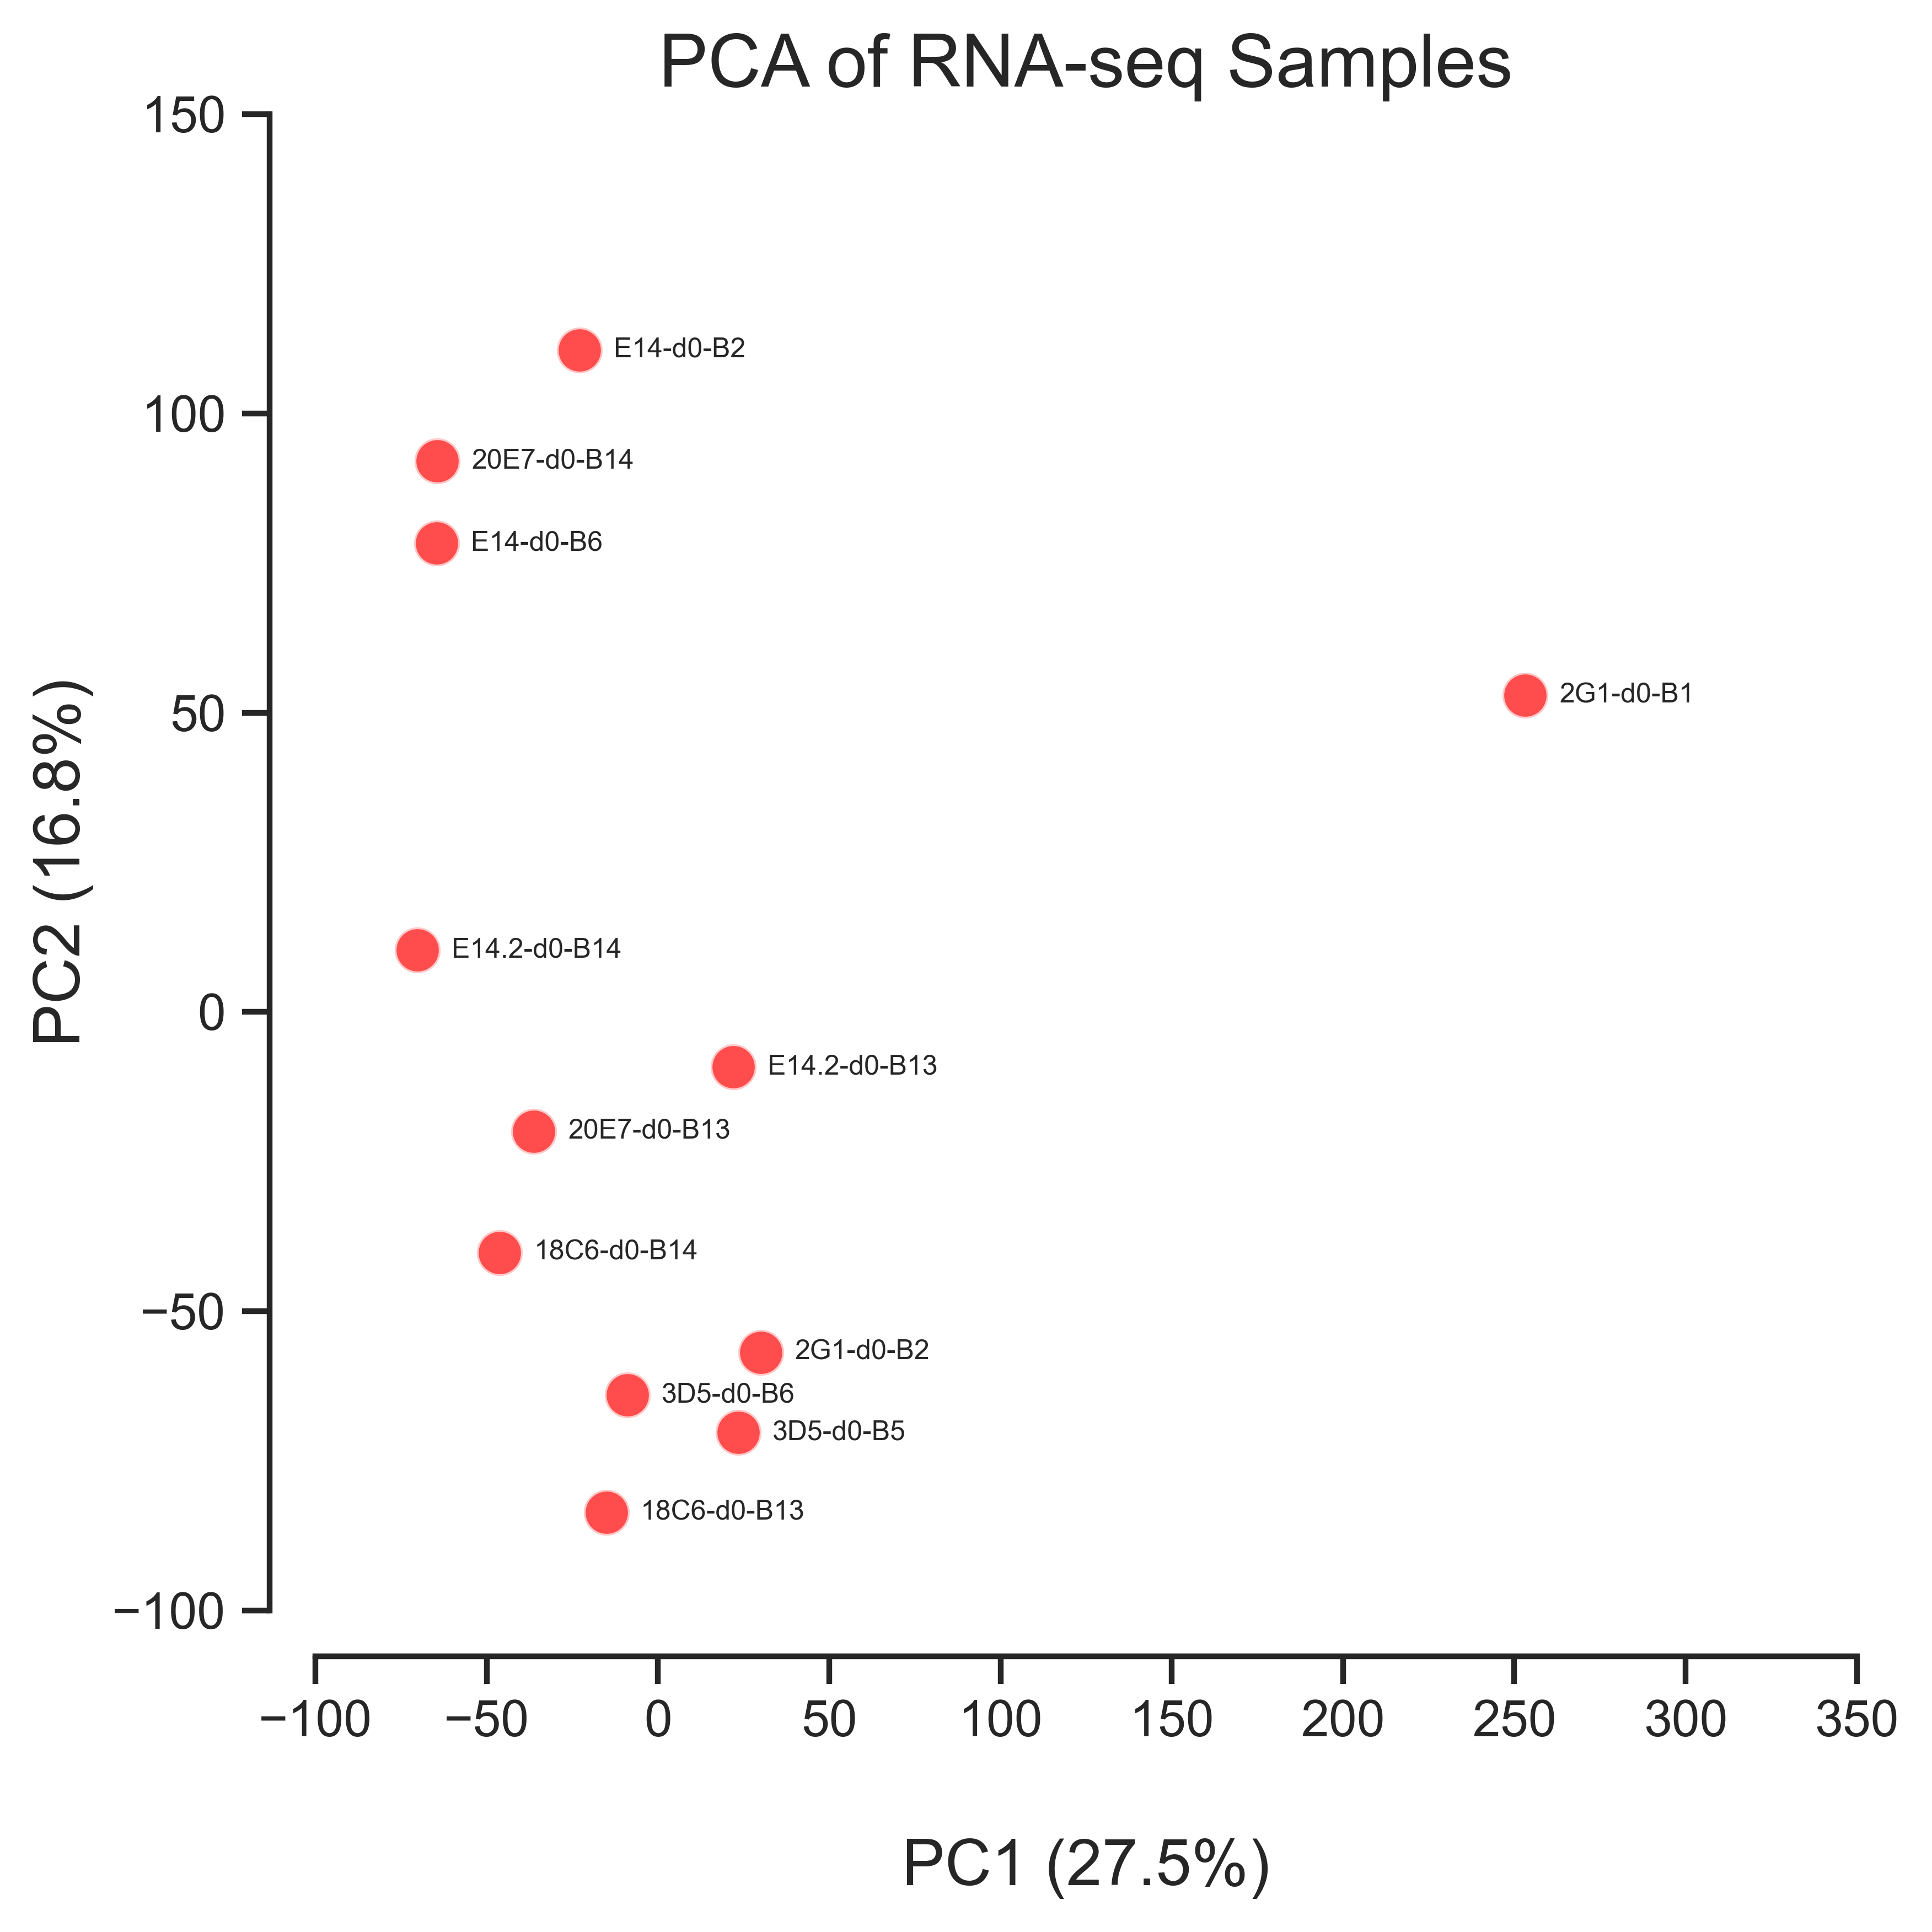

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rna_count.T)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=rna_count.columns)

sns.set_theme(style="ticks", rc={"figure.dpi": 600} )

fig, ax = plt.subplots(figsize=(6, 6))

scatter = sns.scatterplot(
    data=pca_df,
    x='PC1', 
    y='PC2',
    s=100,
    c='red',
    alpha=0.7,
    legend=False,
    ax=ax
)

for i in range(pca_df.shape[0]):
    ax.text(
        pca_df.PC1[i]+10, 
        pca_df.PC2[i], 
        pca_df.index[i],
        fontsize=6,
        ha='left',
        va='center'
    )

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=14, labelpad=20)
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=14)
ax.set_title('PCA of RNA-seq Samples', fontsize=16)
# ax.set_title('a)', fontsize=16, loc='left', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x='PC1', color="0.1", fontsize=10)
plt.yticks(y='PC1', color="0.1", fontsize=10)
ax.set_xlim(-100, 350)
ax.set_ylim(-100, 150)
ax.spines['bottom'].set_position(('outward', 10))
ax.spines['left'].set_position(('outward', 10))  

plt.tight_layout()
plt.show()

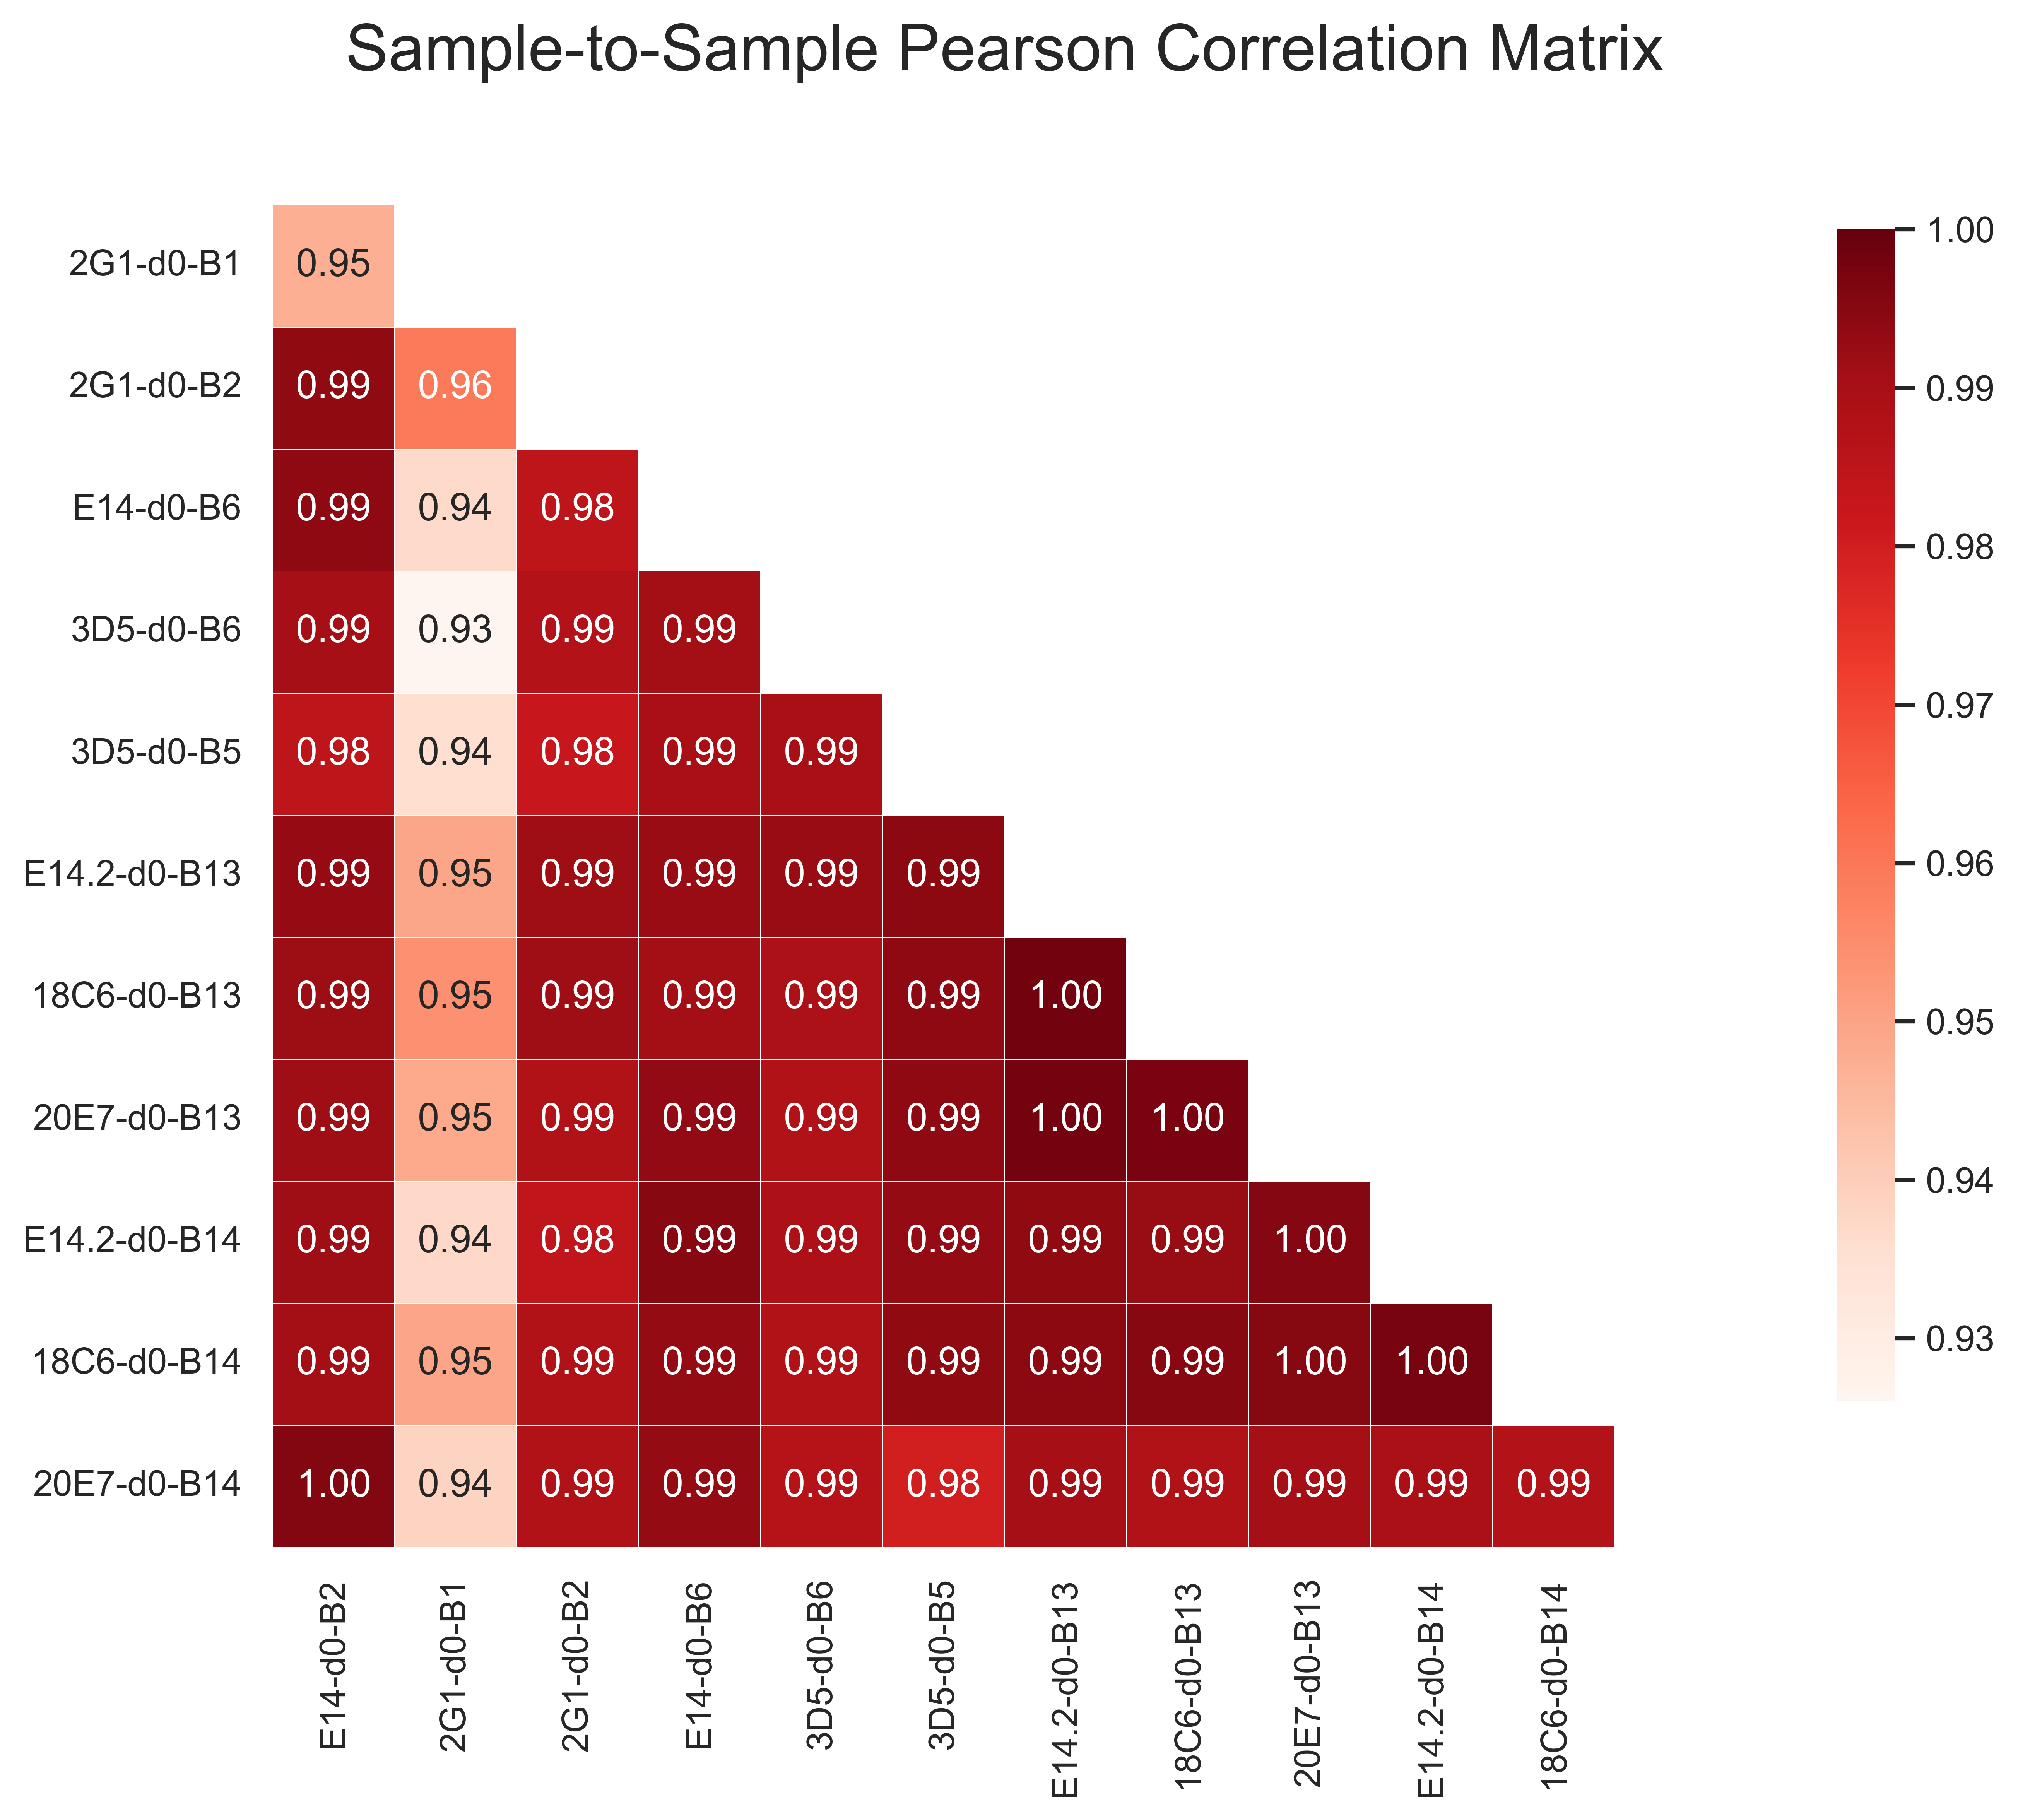

In [12]:
corr = rna_count.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.set_theme(style="white", rc={"figure.dpi": 600})

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    corr, 
    mask=mask,
    cmap='Reds',
    vmin=corr.values.min(), vmax=1,
    annot=True, 
    fmt=".2f",
    linewidths=0.2,
    cbar_kws={"shrink": 0.8},
    square=True,
    ax=ax
)
ax.get_xticklabels()[11].set_visible(False)
ax.get_yticklabels()[0].set_visible(False)

ax.set_title('Sample-to-Sample Pearson Correlation Matrix', fontsize=20, pad=0)
# ax.set_title('b)', fontsize=20, pad=20, loc='left')

plt.tight_layout()
plt.show()

Sample Analysis

In [20]:
counts = pd.read_csv("/Users/sanskar/pythonprojects/singlecell/GSE111205/GSE111205_counts_STAR_GENCODE.txt", index_col=0)

In [21]:
counts = counts.reset_index().rename(columns={"index": "ensembl_id"})


In [22]:
gene_df= counts[['ensembl_id']]

In [ ]:
# ensembl IDs to gene names using BioMart API
def map_ensembl_to_gene_names(df):
    df = df.copy()
    
    query = """http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?>
    <!DOCTYPE Query>
    <Query virtualSchemaName="default" formatter="TSV" header="0" uniqueRows="0" count="" datasetConfigVersion="0.6">
        <Dataset name="mmusculus_gene_ensembl" interface="default">
            <Attribute name="ensembl_gene_id"/>
            <Attribute name="external_gene_name"/>
        </Dataset>
    </Query>
    """

    try:
        response = requests.get(query, headers={"Content-Type": "text/plain"})
        response.raise_for_status()

        mapping = {}
        for line in response.text.splitlines():
            fields = line.split("\t")
            if len(fields) >= 2:
                mapping[fields[0]] = fields[1] if fields[1] else fields[0]

        df["gene_name"] = df["ensembl_id"].str.split(".").str[0].map(mapping).fillna(df["ensembl_id"])

    except Exception as e:
        print(f"Error fetching gene names: {e}")
        df["gene_name"] = df["ensembl_id"]

    return df

gene_df = map_ensembl_to_gene_names(gene_df)
gene_df.head()

Fetching gene names from Ensembl BioMart...


ensembl_id             gene_name
0  ENSMUSG00000090025.1  ENSMUSG00000090025.1
1  ENSMUSG00000064842.1               Gm26206
2  ENSMUSG00000051951.5                  Xkr4
3  ENSMUSG00000089699.1                Gm1992
4  ENSMUSG00000088390.1  ENSMUSG00000088390.1

In [ ]:
# For 40-kb inversion
# E14-d0-B2 + E14-d0-B6 (WT)
# vs
# 3D5-d0-B6 + 3D5-d0-B5 (Clone #1)

kb40_counts = counts[['ensembl_id', 'E14-d0-B2', 'E14-d0-B6', '3D5-d0-B6', '3D5-d0-B5']]
kb40_counts.set_index('ensembl_id', inplace=True)


In [25]:
kb40_counts = kb40_counts[kb40_counts.sum(axis=1)>100]

In [26]:
kb40_counts = kb40_counts.T

In [27]:
metadata40kb = pd.DataFrame({
    'Sample': ['E14-d0-B2', 'E14-d0-B6', '3D5-d0-B6', '3D5-d0-B5'],
    'Condition': ['WT', 'WT', 'RNA_40kb-[Tsix-Xist]', 'RNA_40kb-[Tsix-Xist]'],
})
metadata40kb.set_index('Sample', inplace=True)


In [ ]:
dds40kb= DeseqDataSet(counts=kb40_counts, metadata=metadata40kb, design_factors="Condition")
dds40kb.deseq2()

/var/folders/5k/qbfjn8554118lm2lcy1mydjw0000gn/T/ipykernel_8358/197444526.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds40kb= DeseqDataSet(counts=kb40_counts, metadata=metadata40kb, design_factors="Condition")
Fitting size factors...
... done in 0.00 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 0.86 seconds.

Fitting dispersion trend curve...
... done in 0.11 seconds.

/Users/sanskar/pythonprojects/singlecell/.venv/lib/python3.13/site-packages/pydeseq2/dds.py:541: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.88 seconds.

Fitting LFCs...
... done in 0.55 seconds.

Calculating cook's distance...
... done in 0.00 seconds.

Replacing 0 outlier genes.



In [35]:
gene_df.drop_duplicates(subset=['gene_name'], inplace=True)
gene_df

ensembl_id             gene_name       ensembl_clean
0      ENSMUSG00000090025.1  ENSMUSG00000090025.1  ENSMUSG00000090025
1      ENSMUSG00000064842.1               Gm26206  ENSMUSG00000064842
2      ENSMUSG00000051951.5                  Xkr4  ENSMUSG00000051951
3      ENSMUSG00000089699.1                Gm1992  ENSMUSG00000089699
4      ENSMUSG00000088390.1  ENSMUSG00000088390.1  ENSMUSG00000088390
...                     ...                   ...                 ...
37305  ENSMUSG00000064368.1                mt-Nd6  ENSMUSG00000064368
37306  ENSMUSG00000064369.1                 mt-Te  ENSMUSG00000064369
37307  ENSMUSG00000064370.1               mt-Cytb  ENSMUSG00000064370
37308  ENSMUSG00000064371.1                 mt-Tt  ENSMUSG00000064371
37309  ENSMUSG00000064372.1                 mt-Tp  ENSMUSG00000064372

[37304 rows x 3 columns]

In [36]:
sc.tl.pca(dds40kb)

/Users/sanskar/pythonprojects/singlecell/.venv/lib/python3.13/site-packages/seaborn/distributions.py:1176: UserWarning: linewidths is ignored by contourf
  cset = contour_func(


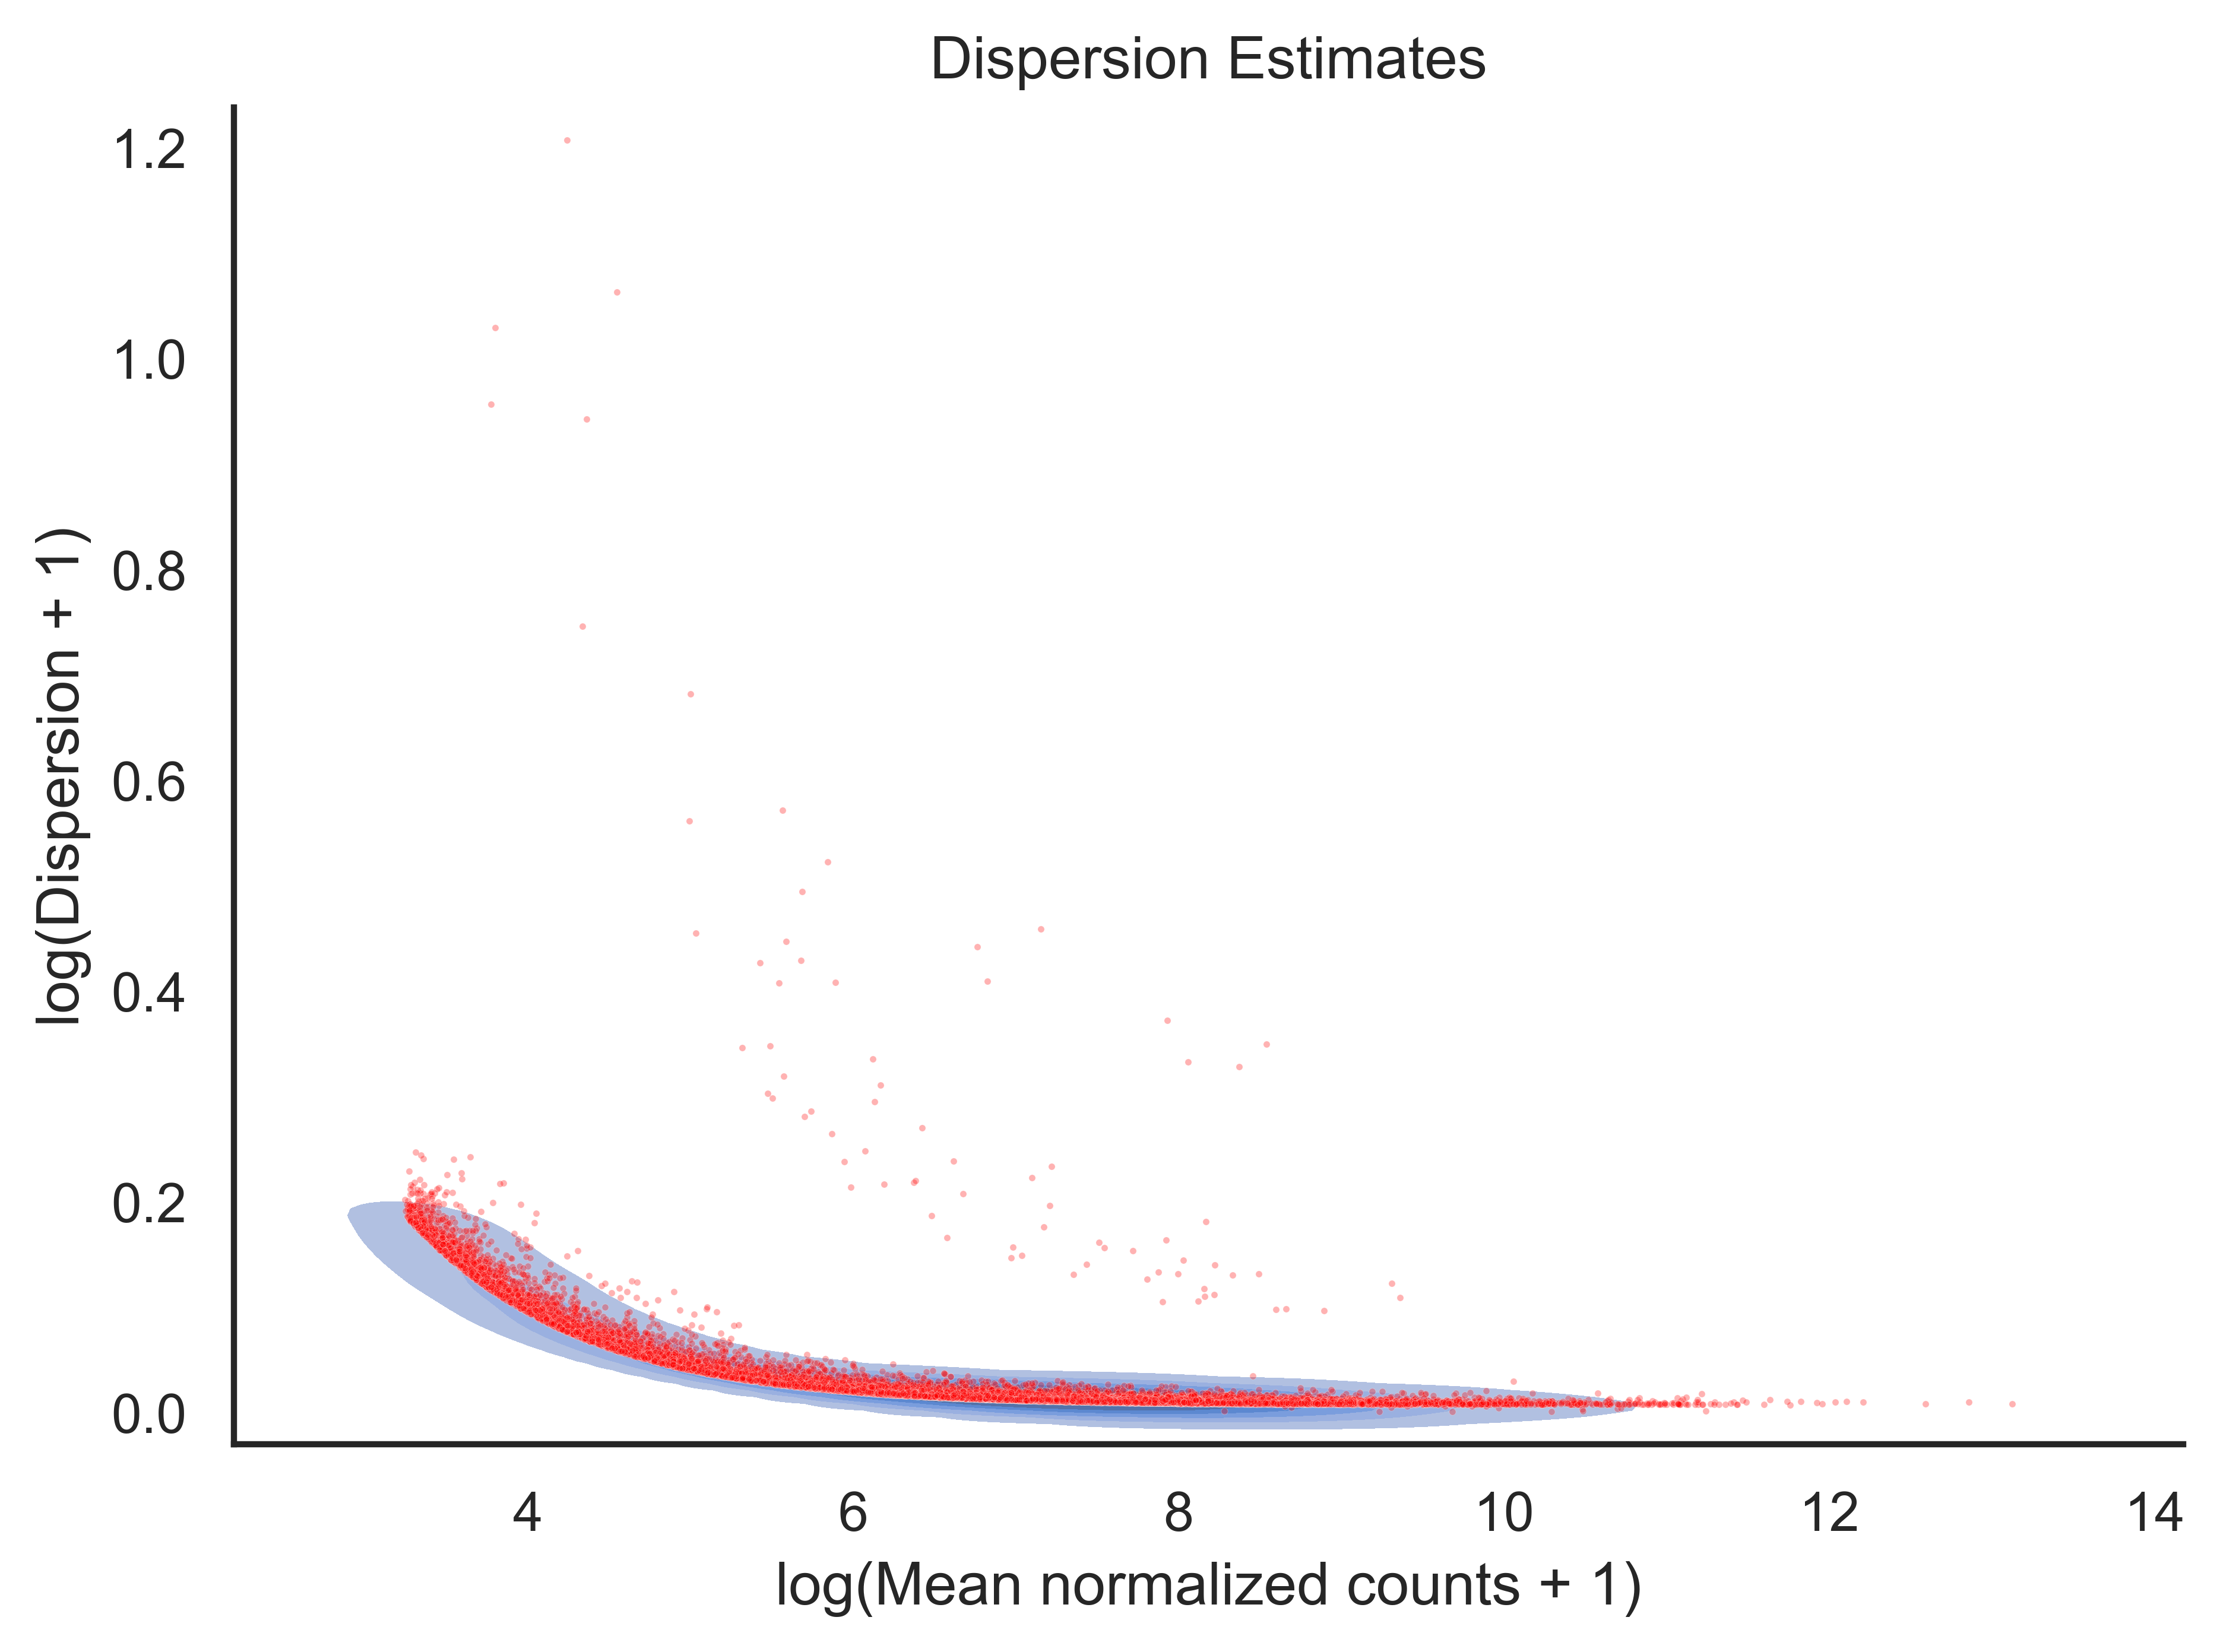

In [52]:
disp = pd.Series(dds40kb.varm['dispersions'].flatten(), index=dds40kb.var_names)
mean_counts = dds40kb.layers['normed_counts'].mean(axis=0)
# plt.figure(figsize=(5,4))
sns.set_theme(style="white")
ax = sns.scatterplot(x=np.log1p(mean_counts), y=np.log1p(disp), color='red',s=1.8, alpha=0.3)
# sns.histplot(x=np.log1p(mean_counts), y=np.log1p(disp), cmap='mako', bins=50, pthresh=.1)
ax = sns.kdeplot(x=np.log1p(mean_counts), y=np.log1p(disp), levels=7, color="b", linewidths=0.4, zorder=0, fill=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("log(Mean normalized counts + 1)")
plt.ylabel("log(Dispersion + 1)")
plt.title("Dispersion Estimates")
# plt.title("a)", loc='left', pad=20)
plt.tight_layout()
plt.show()

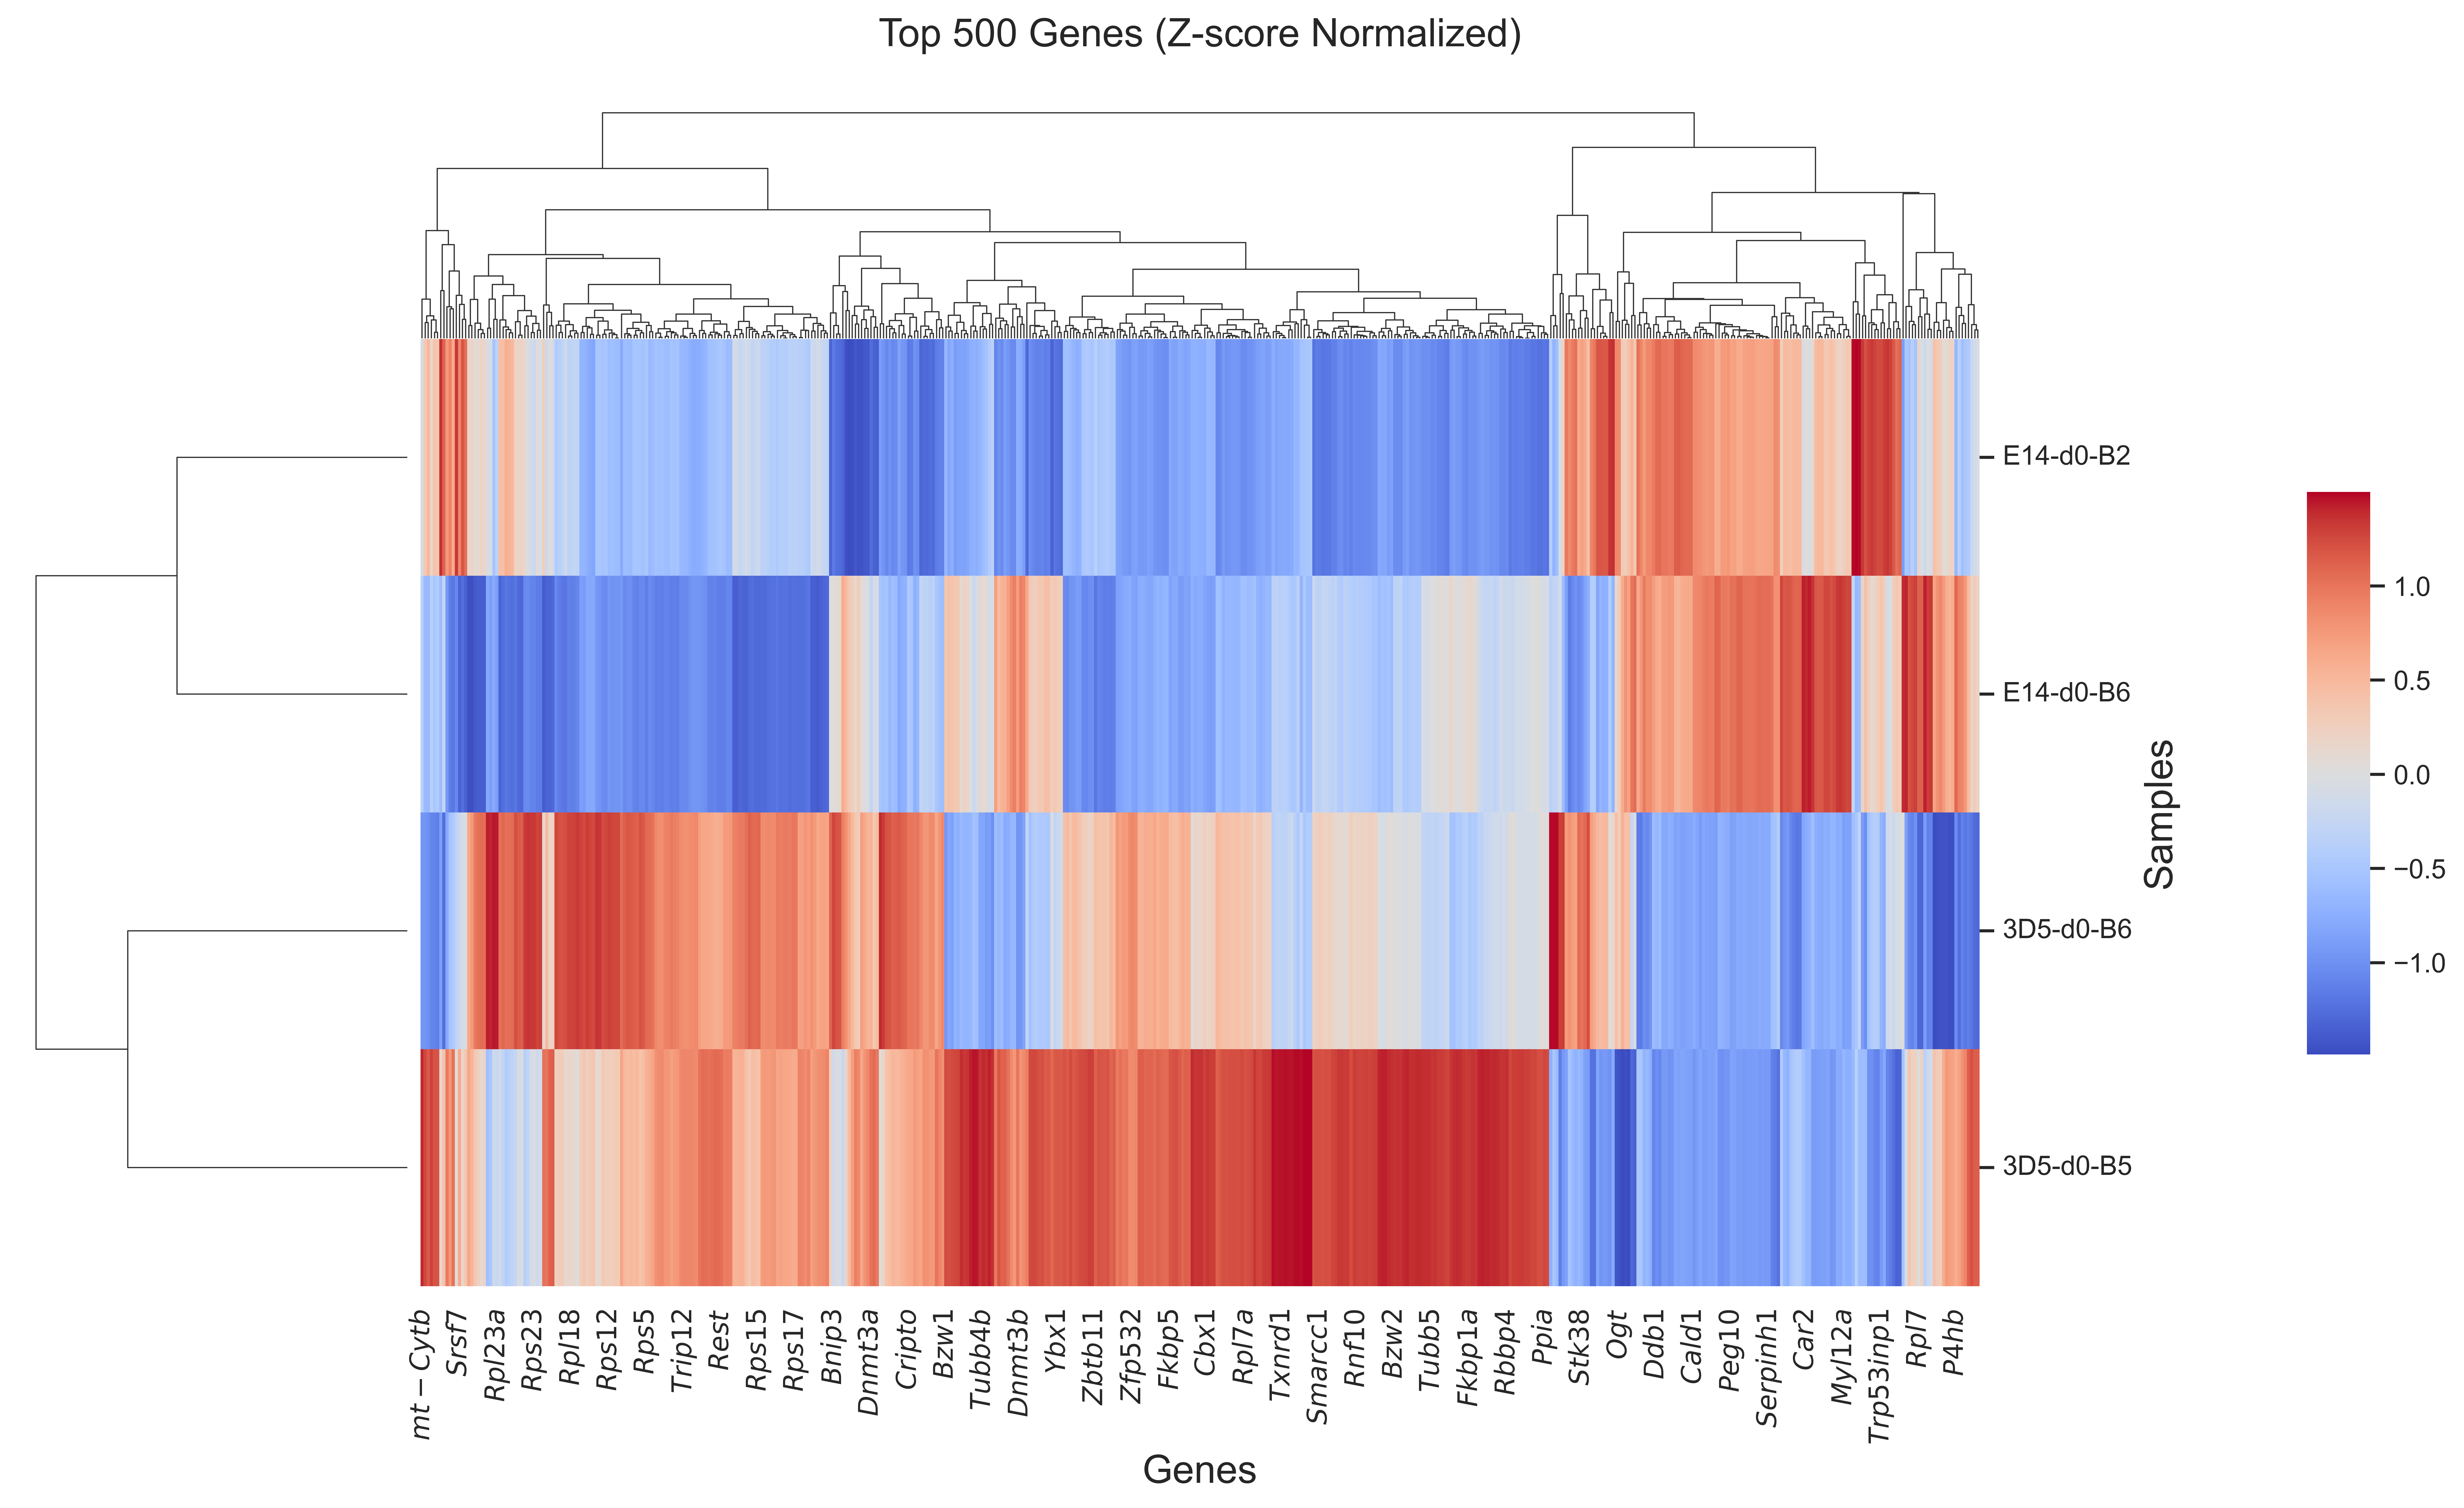

In [ ]:
top_gene_indices = np.var(dds40kb.layers['normed_counts'], axis=0).argsort()[::-1][:500]
top_gene_ids = dds40kb.var_names[top_gene_indices]

gene_df["ensembl_clean"] = gene_df["ensembl_id"].str.split(".").str[0]
gene_map = dict(zip(gene_df["ensembl_clean"], gene_df["gene_name"]))

top_gene_ids_clean = pd.Series(top_gene_ids).str.split(".").str[0]
top_gene_labels = top_gene_ids_clean.map(gene_map).fillna(top_gene_ids_clean).values

top_gene_labels = [f"$\\it{{{g}}}$" for g in top_gene_labels]

expr_matrix = pd.DataFrame(
    dds40kb.layers['normed_counts'][:, top_gene_indices],
    index=dds40kb.obs_names,
    columns=top_gene_labels
)

expr_matrix_z = (expr_matrix - expr_matrix.mean()) / expr_matrix.std()

ax = sns.clustermap(expr_matrix_z, cmap='coolwarm', figsize=(12, 8), col_cluster=True, row_cluster=True)
ax.ax_heatmap.set_yticklabels(ax.ax_heatmap.get_yticklabels(), rotation=0, va='center')
# ax.ax_heatmap.set_xticklabels(ax.ax_heatmap.get_xticklabels())
ax.ax_heatmap.set_ylabel('Samples', fontsize=16)
ax.ax_heatmap.set_xlabel('Genes', fontsize=16)

ax.ax_heatmap.set_title('Top 500 Genes (Z-score Normalized)', fontsize=16, pad=120)
# ax.ax_heatmap.set_title('c)', fontsize=16, pad=120)
ax.cax.set_position([1.1, 0.3, 0.03, 0.4])

In [38]:
stats40kb= DeseqStats(dds40kb, contrast=["Condition", "RNA_40kb-[Tsix-Xist]", "WT"])
stats40kb.summary()


Running Wald tests...


Log2 fold change & Wald test p-value: Condition RNA_40kb-[Tsix-Xist] vs WT
                            baseMean  log2FoldChange     lfcSE      stat  \
ensembl_id                                                                 
ENSMUSG00000051951.5       66.741378       -2.669361  0.594390 -4.490929   
ENSMUSG00000033845.7     7198.695176        0.297297  0.148994  1.995364   
ENSMUSG00000025903.8     6728.043308        0.046937  0.146550  0.320281   
ENSMUSG00000033813.8     6141.273666        0.018519  0.134940  0.137238   
ENSMUSG00000002459.10      62.902787       -0.156073  0.476754 -0.327366   
...                              ...             ...       ...       ...   
ENSMUSG00000064363.1    41089.165594        0.024348  0.147660  0.164895   
ENSMUSG00000064367.1    72399.614401       -0.157857  0.160409 -0.984091   
ENSMUSG00000064368.1      919.649020       -0.704046  1.026970 -0.685556   
ENSMUSG00000064370.1   125936.396788        0.064536  0.148274  0.435251   
ENSMUSG000000

... done in 0.30 seconds.



In [41]:
results40kb= stats40kb.results_df
results40kb= results40kb[results40kb.baseMean>=10]

In [42]:
results40kb=results40kb.reset_index()

In [43]:
results40kb

ensembl_id       baseMean  log2FoldChange     lfcSE  \
0       ENSMUSG00000051951.5      66.741378       -2.669361  0.594390   
1       ENSMUSG00000033845.7    7198.695176        0.297297  0.148994   
2       ENSMUSG00000025903.8    6728.043308        0.046937  0.146550   
3       ENSMUSG00000033813.8    6141.273666        0.018519  0.134940   
4      ENSMUSG00000002459.10      62.902787       -0.156073  0.476754   
...                      ...            ...             ...       ...   
13889   ENSMUSG00000064363.1   41089.165594        0.024348  0.147660   
13890   ENSMUSG00000064367.1   72399.614401       -0.157857  0.160409   
13891   ENSMUSG00000064368.1     919.649020       -0.704046  1.026970   
13892   ENSMUSG00000064370.1  125936.396788        0.064536  0.148274   
13893   ENSMUSG00000064371.1      63.206646       -0.033939  0.481695   

           stat    pvalue      padj  
0     -4.490929  0.000007  0.000123  
1      1.995364  0.046003  0.178873  
2      0.320281  0.748755  0.893107  
3      0.137238  0.890843  0.958520  
4     -0.327366  0.743391  0.890020  
...         ...       ...       ...  
13889  0.164895  0.869027  0.948315  
13890 -0.984091  0.325071  0.601986  
13891 -0.685556  0.492993  0.739303  
13892  0.435251  0.663380  0.845249  
13893 -0.070458  0.943829  0.980600  

[13894 rows x 7 columns]

In [44]:
gene_df.drop_duplicates(subset=['gene_name'], inplace=True)
gene_df

ensembl_id             gene_name       ensembl_clean
0      ENSMUSG00000090025.1  ENSMUSG00000090025.1  ENSMUSG00000090025
1      ENSMUSG00000064842.1               Gm26206  ENSMUSG00000064842
2      ENSMUSG00000051951.5                  Xkr4  ENSMUSG00000051951
3      ENSMUSG00000089699.1                Gm1992  ENSMUSG00000089699
4      ENSMUSG00000088390.1  ENSMUSG00000088390.1  ENSMUSG00000088390
...                     ...                   ...                 ...
37305  ENSMUSG00000064368.1                mt-Nd6  ENSMUSG00000064368
37306  ENSMUSG00000064369.1                 mt-Te  ENSMUSG00000064369
37307  ENSMUSG00000064370.1               mt-Cytb  ENSMUSG00000064370
37308  ENSMUSG00000064371.1                 mt-Tt  ENSMUSG00000064371
37309  ENSMUSG00000064372.1                 mt-Tp  ENSMUSG00000064372

[37304 rows x 3 columns]

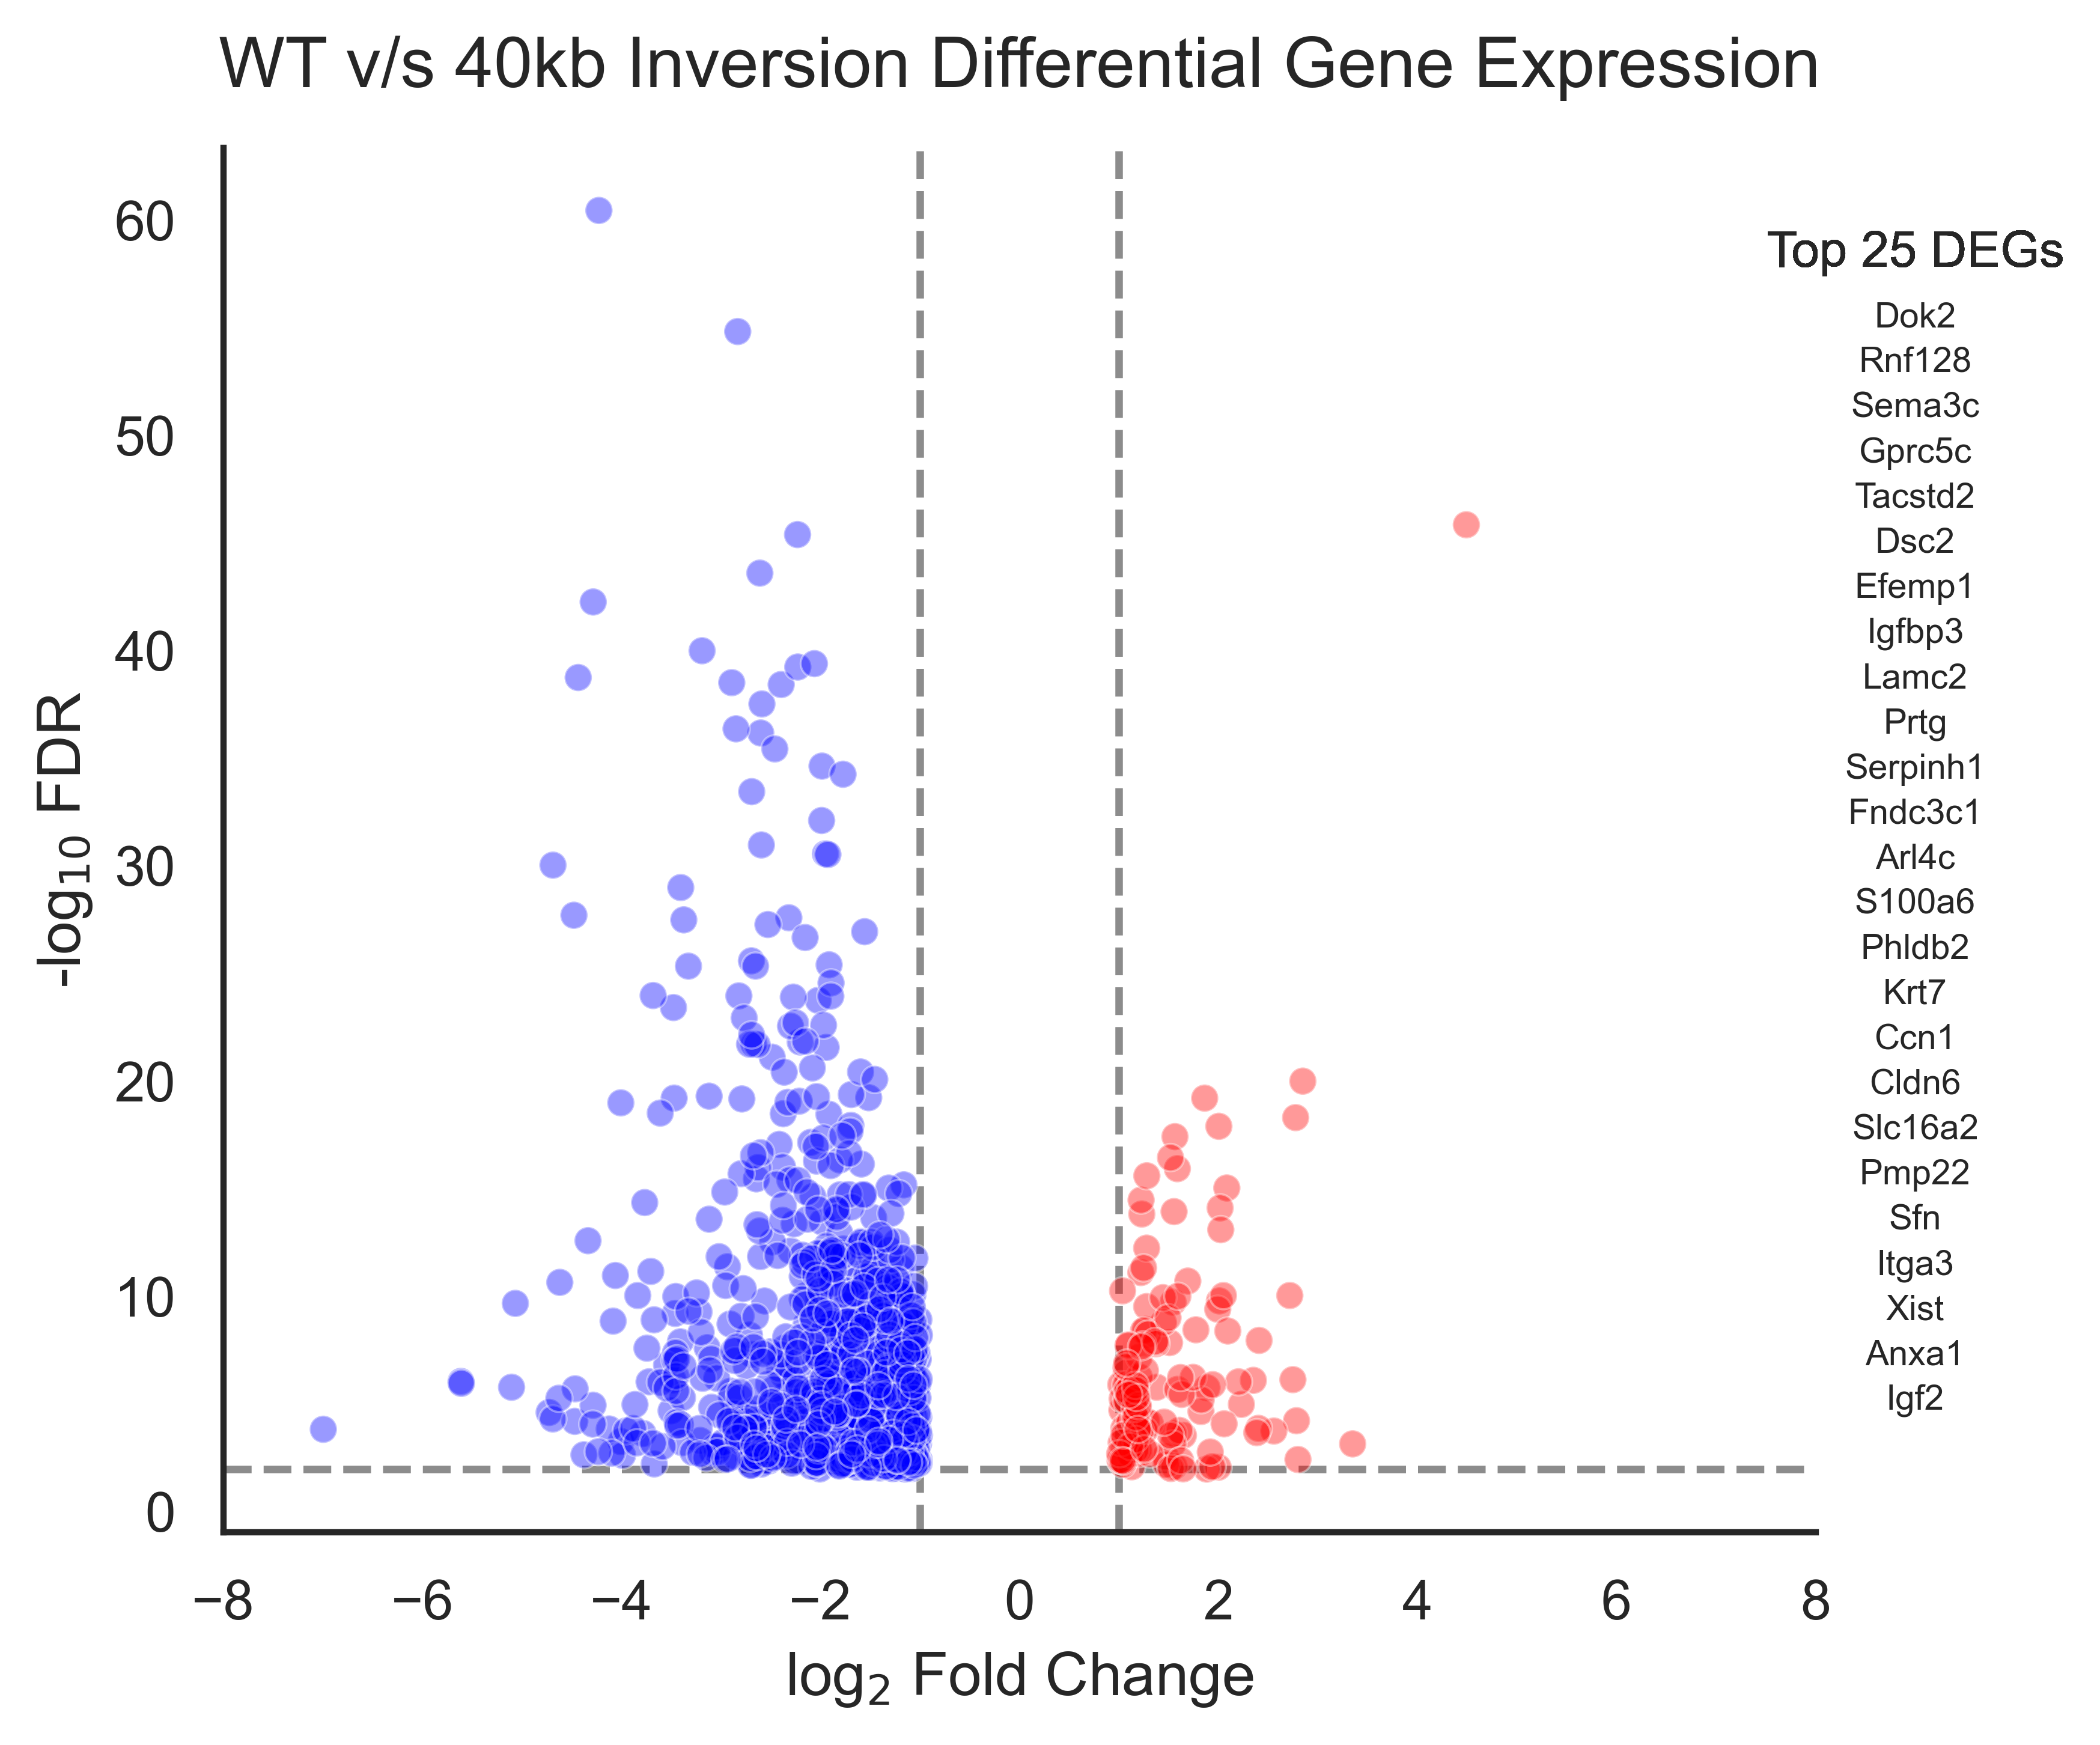

['Dok2' 'Rnf128' 'Sema3c' 'Gprc5c' 'Tacstd2' 'Dsc2' 'Efemp1' 'Igfbp3'
 'Lamc2' 'Prtg' 'Serpinh1' 'Fndc3c1' 'Arl4c' 'S100a6' 'Phldb2' 'Krt7'
 'Ccn1' 'Cldn6' 'Slc16a2' 'Pmp22' 'Sfn' 'Itga3' 'Xist' 'Anxa1' 'Igf2']


In [ ]:
volc = results40kb[["ensembl_id", "log2FoldChange", "padj", "baseMean"]].copy()
volc["neglog10p"] = -np.log10(volc["padj"])
volc = volc.merge(gene_df[["ensembl_id", "gene_name"]], on="ensembl_id", how="left")

volc = volc[(volc["neglog10p"] >= 2) & (volc["log2FoldChange"].abs() >= 1)].copy()

def map_color(a):
    log2FoldChange = a
    if a >= 1:
        return 'red'
    else:
        return 'blue'
volc['color'] = volc['log2FoldChange'].apply(map_color)

plt.figure(figsize=(6, 5))
sns.set_theme(style="white", rc={"figure.dpi": 600})

ax = sns.scatterplot(
    data=volc,
    x="log2FoldChange",
    y="neglog10p",
    hue='color',
    palette={'red': 'red', 'blue': 'blue'},
    alpha=0.4,
    s=30
)

ax.axhline(2, c='k', ls='--', zorder=0, alpha=0.5)
ax.axvline(1, c='k', ls='--', zorder=0, alpha=0.5)
ax.axvline(-1, c='k', ls='--', zorder=0, alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

highlighted = volc[(volc["neglog10p"] > 10) & (volc["log2FoldChange"].abs() > 2)]
highlighted = highlighted.sort_values("neglog10p", ascending=False).head(25)

# evenly distributesd label y-positions
y_positions = np.linspace(volc['neglog10p'].max()/3-10, volc['neglog10p'].max(), len(highlighted))

for i, (_, row) in enumerate(highlighted.iterrows()):
    x_offset=9 #0.5 if row.log2FoldChange > 0 else -0.5
    ax.text(x_offset, y_positions[i]-5, row.gene_name, 
            va='center', ha='center', fontsize=7)
    ax.text(9,volc['neglog10p'].max()-2, "Top 25 DEGs", va='center', ha='center', fontsize=10)
# for _, row in highlighted.iterrows():
#     x_offset = 0.5 if row.log2FoldChange > 0 else -0.5
#     y_offset= random.uniform(0.5, 0)
#     ax.text(x_offset, row.neglog10p + y_offset, row.gene_name,va='center',fontsize=4, bbox=dict(boxstyle='round,pad=0.1', fc='white', ec='black', lw=0.5))

plt.xlim(-8, 8)
plt.title("WT v/s 40kb Inversion Differential Gene Expression", size=14, pad=12)
# plt.title("b)", size=12, pad=20, loc='left')
plt.legend().remove()
plt.xlabel(r"log$_2$ Fold Change", size=12)
plt.ylabel(r"-log$_{10}$ FDR", size=12)
plt.tight_layout()
plt.show()
top25=highlighted.sort_values("neglog10p", ascending=True).head(25).gene_name.values
print(highlighted.sort_values("neglog10p", ascending=True).head(25).gene_name.values)

gsea

In [46]:
highlighted = volc[(volc["neglog10p"] > 2) & (volc["log2FoldChange"].abs() > 1)]
top40kb=highlighted.sort_values("neglog10p", ascending=True).gene_name.values



In [ ]:
top40kb = top40kb.tolist()
enr = gp.enrichr(
    gene_list=top40kb,
    gene_sets='GO_Biological_Process_2021',
    organism='Mouse',
    outdir='enrichr_results',
    no_plot=True 
)

enr.results.head()

Gene_set  \
0  GO_Biological_Process_2021   
1  GO_Biological_Process_2021   
2  GO_Biological_Process_2021   
3  GO_Biological_Process_2021   
4  GO_Biological_Process_2021   

                                                Term Overlap       P-value  \
0     extracellular matrix organization (GO:0030198)  57/300  1.396585e-19   
1  extracellular structure organization (GO:0043062)  44/216  1.424161e-16   
2  external encapsulating structure organization ...  44/217  1.707060e-16   
3     supramolecular fiber organization (GO:0097435)  54/351  1.655462e-14   
4          collagen fibril organization (GO:0030199)   24/89  2.065900e-12   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      5.022120e-16            0                     0    4.957553   
1      2.046196e-13            0                     0    5.348863   
2      2.046196e-13            0                     0    5.317663   
3      1.488260e-11            0                     0    3.818793   
4      1.485795e-09            0                     0    7.595833   

   Combined Score                                              Genes  
0      215.232596  DDR1;APP;COL16A1;ITGB3;COL12A1;SERPINE1;LOXL4;...  
1      195.168128  DDR1;APP;COL16A1;COL11A1;ITGB3;LAMA4;SERPINE1;...  
2      193.066206  DDR1;APP;COL16A1;COL11A1;ITGB3;LAMA4;SERPINE1;...  
3      121.178352  APP;HIP1;COL16A1;COL12A1;LMOD1;STMN3;LOXL4;STM...  
4      204.369345  TGFB2;COL16A1;COL27A1;LAMB3;COL11A1;COL12A1;P3...

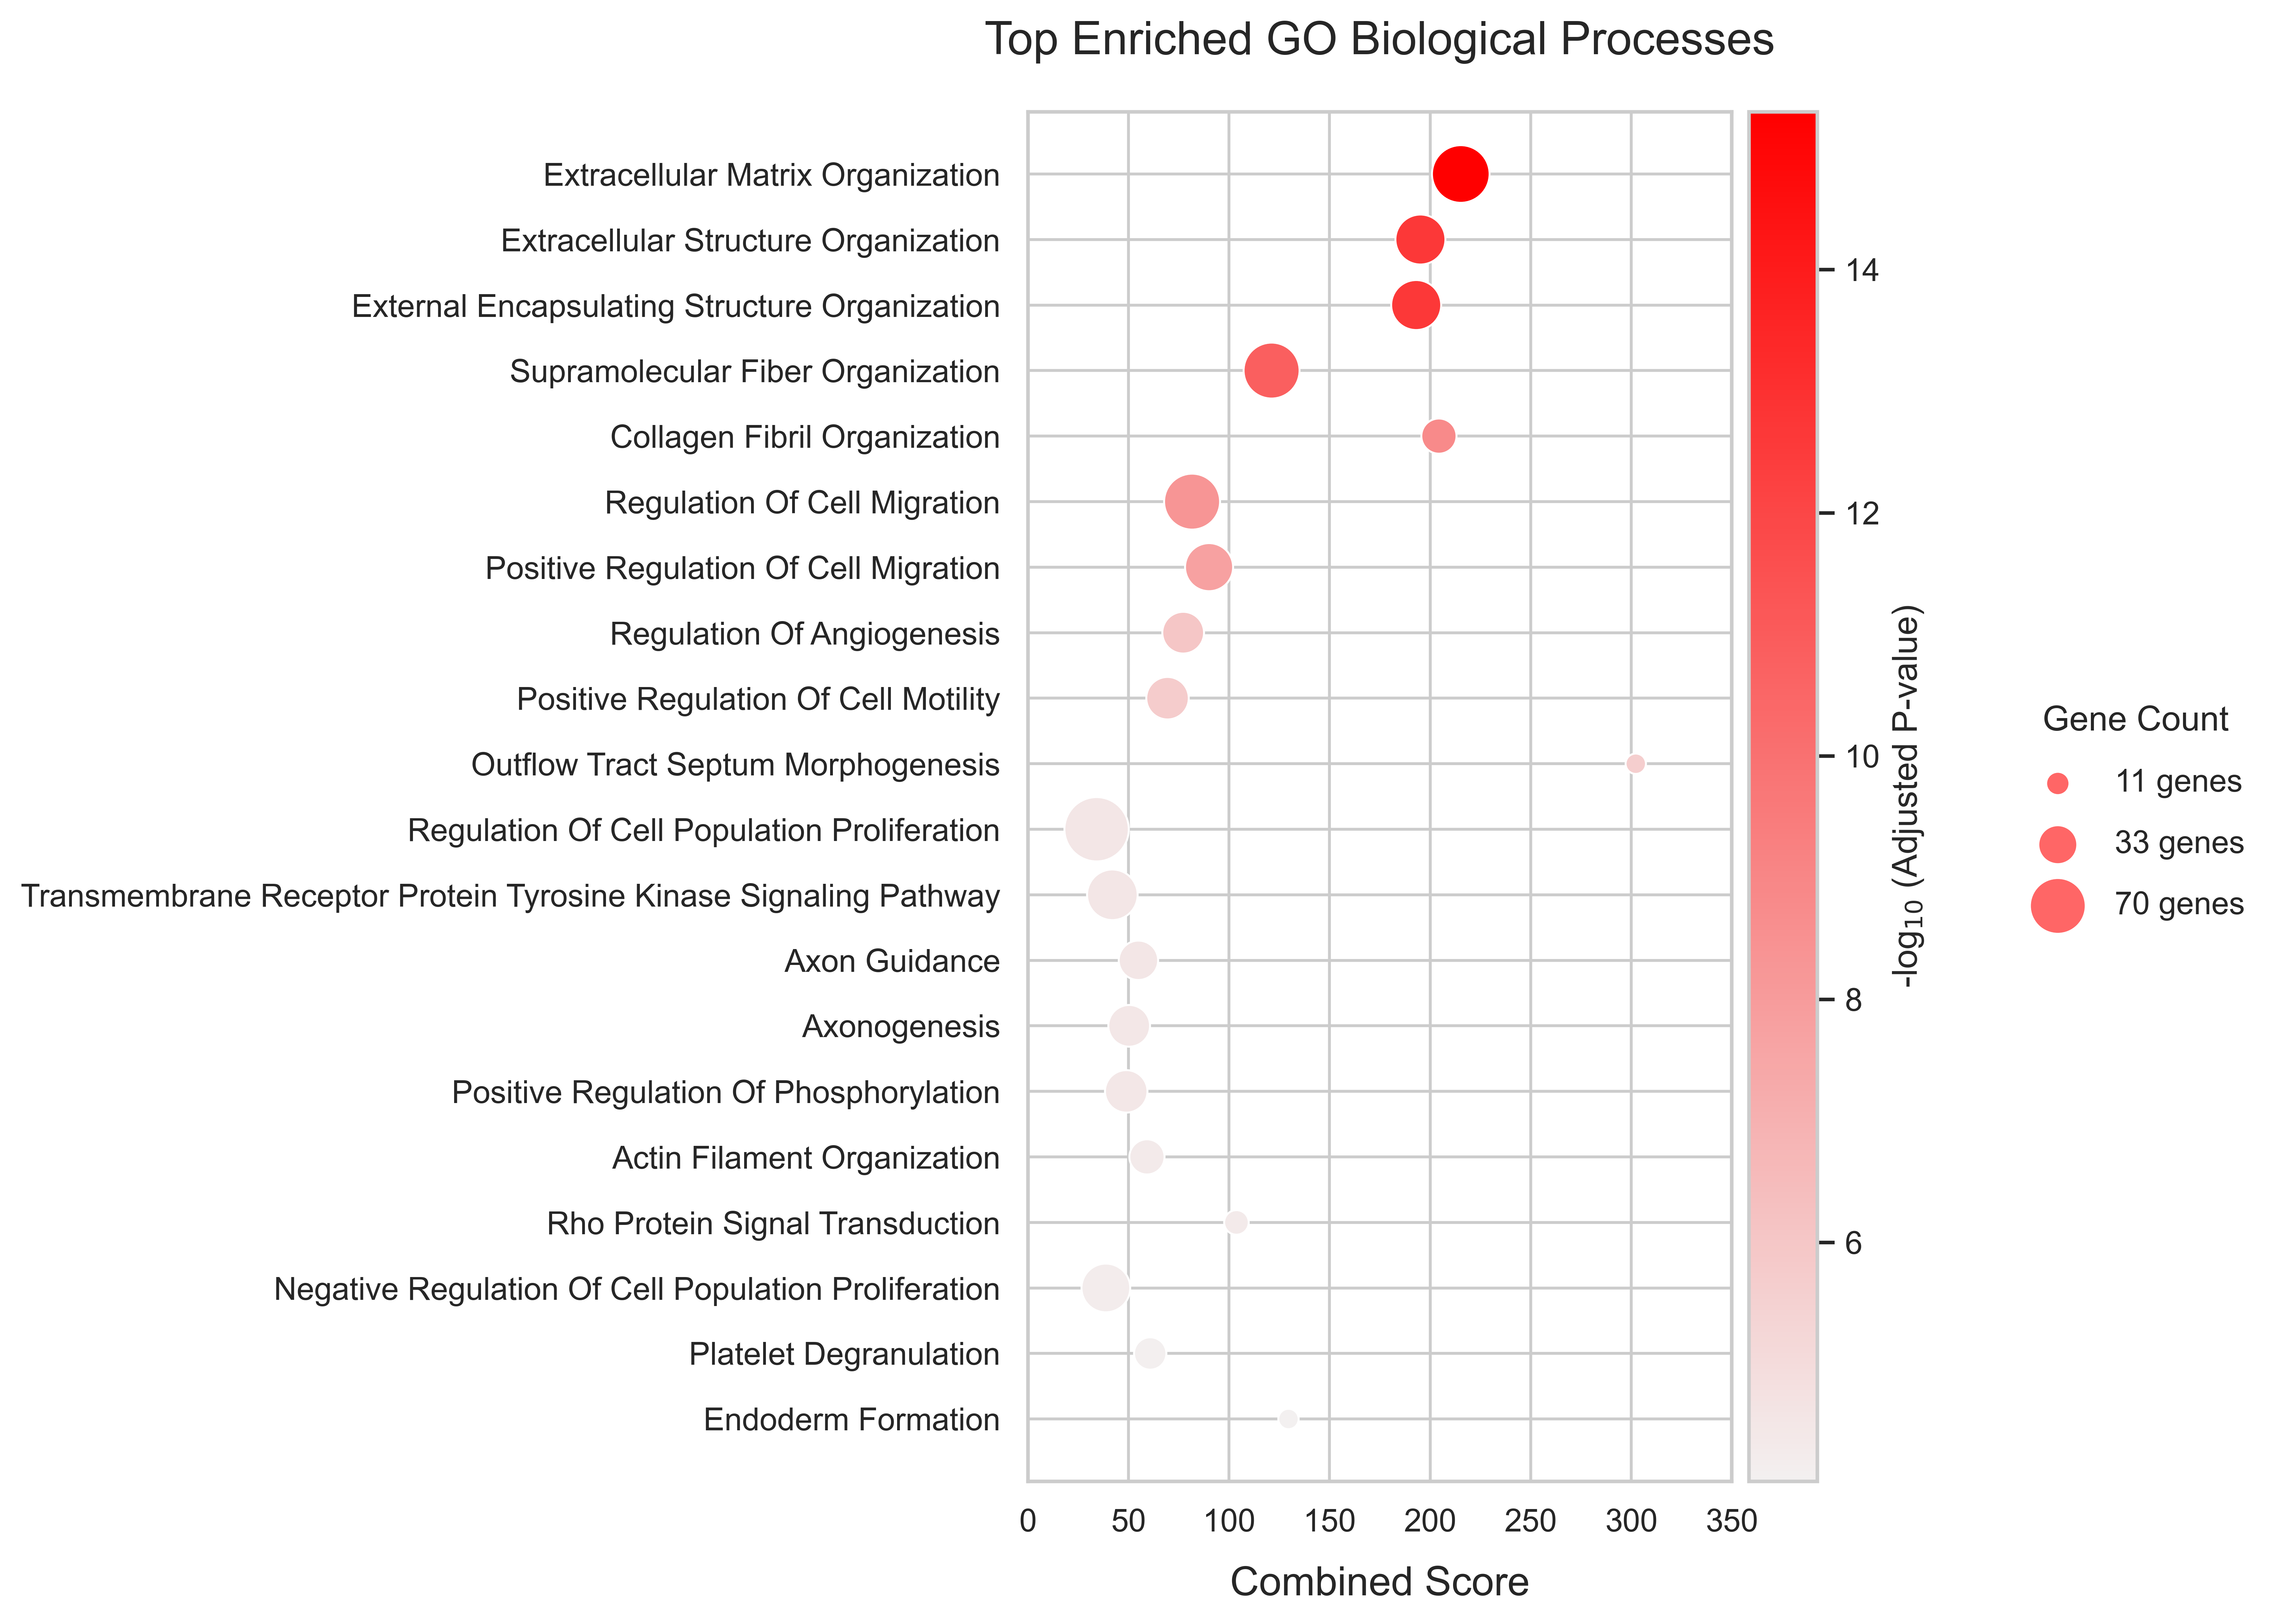

In [ ]:
top_results = enr.results.sort_values('Adjusted P-value').head(20).copy()

# -log10(padj) and Gene Count
top_results['logAdjP'] = -np.log10(top_results['Adjusted P-value'])
top_results['Gene_Count'] = top_results['Overlap'].str.split('/').str[0].astype(int)

# cleaning terms
top_results['Term_Clean'] = top_results['Term'].apply(
    lambda x: x.title().split(' (Go:')[0] if ' (GO:' in x else x
)

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 8))

scatter = sns.scatterplot(
    data=top_results,
    x="Combined Score",
    y="Term_Clean",
    size="Gene_Count",
    sizes=(50, 500),
    hue="logAdjP",
    palette=sns.light_palette("red", as_cmap=True),
    legend=False,  
    ax=ax
)

# colorbar
norm = plt.Normalize(top_results['logAdjP'].min(), top_results['logAdjP'].max())
sm = plt.cm.ScalarMappable(cmap=sns.light_palette("red", as_cmap=True), norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label(r"-log$_{10}$ (Adjusted P-value)", fontsize=12)

size_vals = [top_results['Gene_Count'].min(), 
             int(top_results['Gene_Count'].median()), 
             top_results['Gene_Count'].max()]

# sdummy scatter points for the size legend
for size in size_vals:
    ax.scatter([], [], s=size/2*10, color="red", alpha=0.6, label=f"{size} genes", edgecolors="none")

# size legend
ax.legend(
    title="Gene Count",
    loc='lower left',
    bbox_to_anchor=(1.4, 0.4),
    borderaxespad=0,
    frameon=False,
    labelspacing=1,
)

ax.set_xlim(0,350)
ax.set_title('Top Enriched GO Biological Processes', fontsize=16, pad=20)
ax.set_xlabel('Combined Score', fontsize=14, labelpad=10)
# ax.set_ylabel('Gene Ontology Term', fontsize=14, labelpad=10)
plt.ylabel("")
plt.tight_layout()
plt.show()